# GaussDrive.jl

- Author: Shuhei Ohno
- Licence: CC-BY-4.0
- Repository: https://github.com/ohno/gaussian

## Environment

In [1]:
versioninfo()

Julia Version 1.9.2
Commit e4ee485e90 (2023-07-05 09:39 UTC)
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
  CPU: 8 × 11th Gen Intel(R) Core(TM) i7-1185G7 @ 3.00GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-14.0.6 (ORCJIT, tigerlake)
  Threads: 2 on 8 virtual cores


## Packages

In [2]:
# If you run first time you run the program, remove "#".
# using Pkg
# Pkg.add("Plots")
# Pkg.add("SpecialFunctions")
# Pkg.add("Markdown")

using Plots
using SpecialFunctions
using Markdown
using Printf
include("./GaussDrive.jl")

Main.GaussDrive

## Test

test installation:

In [3]:
if isfile("./hello/R=1.40.out")
    rm("./hello/R=1.40.out")
end

run(`sh g16.sh ./hello/R=1.40.gjf`)

g16.exe ./hello/R=1.40.gjf > ./hello/R=1.40.out


Process(`sh g16.sh ./hello/R=1.40.gjf`, ProcessExited(0))

## Hello World!

Generating input file `./hello.gjf`.

In [4]:
GaussDrive.write("./hello/R=1.40.gjf", 
    """# HF/STO-3G units=au

    H2

    0  1
    H  0.0  0.0  0.0
    H  0.0  0.0  1.40


    """
)

Running input file `./hello.gjf`.

In [5]:
GaussDrive.run("./hello/R=1.40.gjf")

g16.exe ./hello/R=1.40.gjf > already done


Process(`sh.exe 'C:\Users\user\Desktop\gaussian\examples/g16.sh' ./hello/R=1.40.gjf`, ProcessExited(0))

Analysing output file `./hello.out`.

In [6]:
GaussDrive.method("./hello/R=1.40.out")

"HF"

In [7]:
GaussDrive.basis("./hello/R=1.40.out")

"STO-3G"

In [8]:
GaussDrive.energy("./hello/R=1.40.out")

-0.941480655518

Some techniques:

In [9]:
GaussDrive.energy("./hello/R=1.40.out", method="HF")

-0.941480655518

In [10]:
GaussDrive.get("./hello/R=1.40.out", r" SCF Done:  E\(.*\) =\s*(?<target>[+-]?\d+(?:\.\d+)?)\s*.*")

-0.941480655518

minimum example:

In [11]:
# configuration
method = "HF"
basis = "STO-3G"

# file name
name = "./hello/R=1.40"

# generating input file
GaussDrive.write("$name.gjf", 
"""# $(method)/$(basis)

H2

0 1
H  0.0  0.0  0.0
H  0.0  0.0  1.4


""")

# run
GaussDrive.run("$name.gjf")

# result
energy = GaussDrive.energy("$name.out")

g16.exe ./hello/R=1.40.gjf > already done


-0.941480655518

## PEC

g16.exe ./PEC/H2/RHF/STO-3G/R=0.6.gjf > ./PEC/H2/RHF/STO-3G/R=0.6.out
0.6	-0.668256409233
g16.exe ./PEC/H2/RHF/STO-3G/R=0.8.gjf > ./PEC/H2/RHF/STO-3G/R=0.8.out
0.8	-0.947307929985
g16.exe ./PEC/H2/RHF/STO-3G/R=1.0.gjf > ./PEC/H2/RHF/STO-3G/R=1.0.out
1.0	-1.06599946155
g16.exe ./PEC/H2/RHF/STO-3G/R=1.2.gjf > ./PEC/H2/RHF/STO-3G/R=1.2.out
1.2	-1.11033388249
g16.exe ./PEC/H2/RHF/STO-3G/R=1.4.gjf > ./PEC/H2/RHF/STO-3G/R=1.4.out
1.4	-1.11671432518
g16.exe ./PEC/H2/RHF/STO-3G/R=1.6.gjf > ./PEC/H2/RHF/STO-3G/R=1.6.out
1.6	-1.10314097082
g16.exe ./PEC/H2/RHF/STO-3G/R=1.8.gjf > ./PEC/H2/RHF/STO-3G/R=1.8.out
1.8	-1.0789822124
g16.exe ./PEC/H2/RHF/STO-3G/R=2.0.gjf > ./PEC/H2/RHF/STO-3G/R=2.0.out
2.0	-1.04917090258
g16.exe ./PEC/H2/RHF/STO-3G/R=2.2.gjf > ./PEC/H2/RHF/STO-3G/R=2.2.out
2.2	-1.0164857222
g16.exe ./PEC/H2/RHF/STO-3G/R=2.4.gjf > ./PEC/H2/RHF/STO-3G/R=2.4.out
2.4	-0.982699327065
g16.exe ./PEC/H2/RHF/STO-3G/R=2.6.gjf > ./PEC/H2/RHF/STO-3G/R=2.6.out
2.6	-0.94904315397
g16.exe ./PEC/H2/RHF

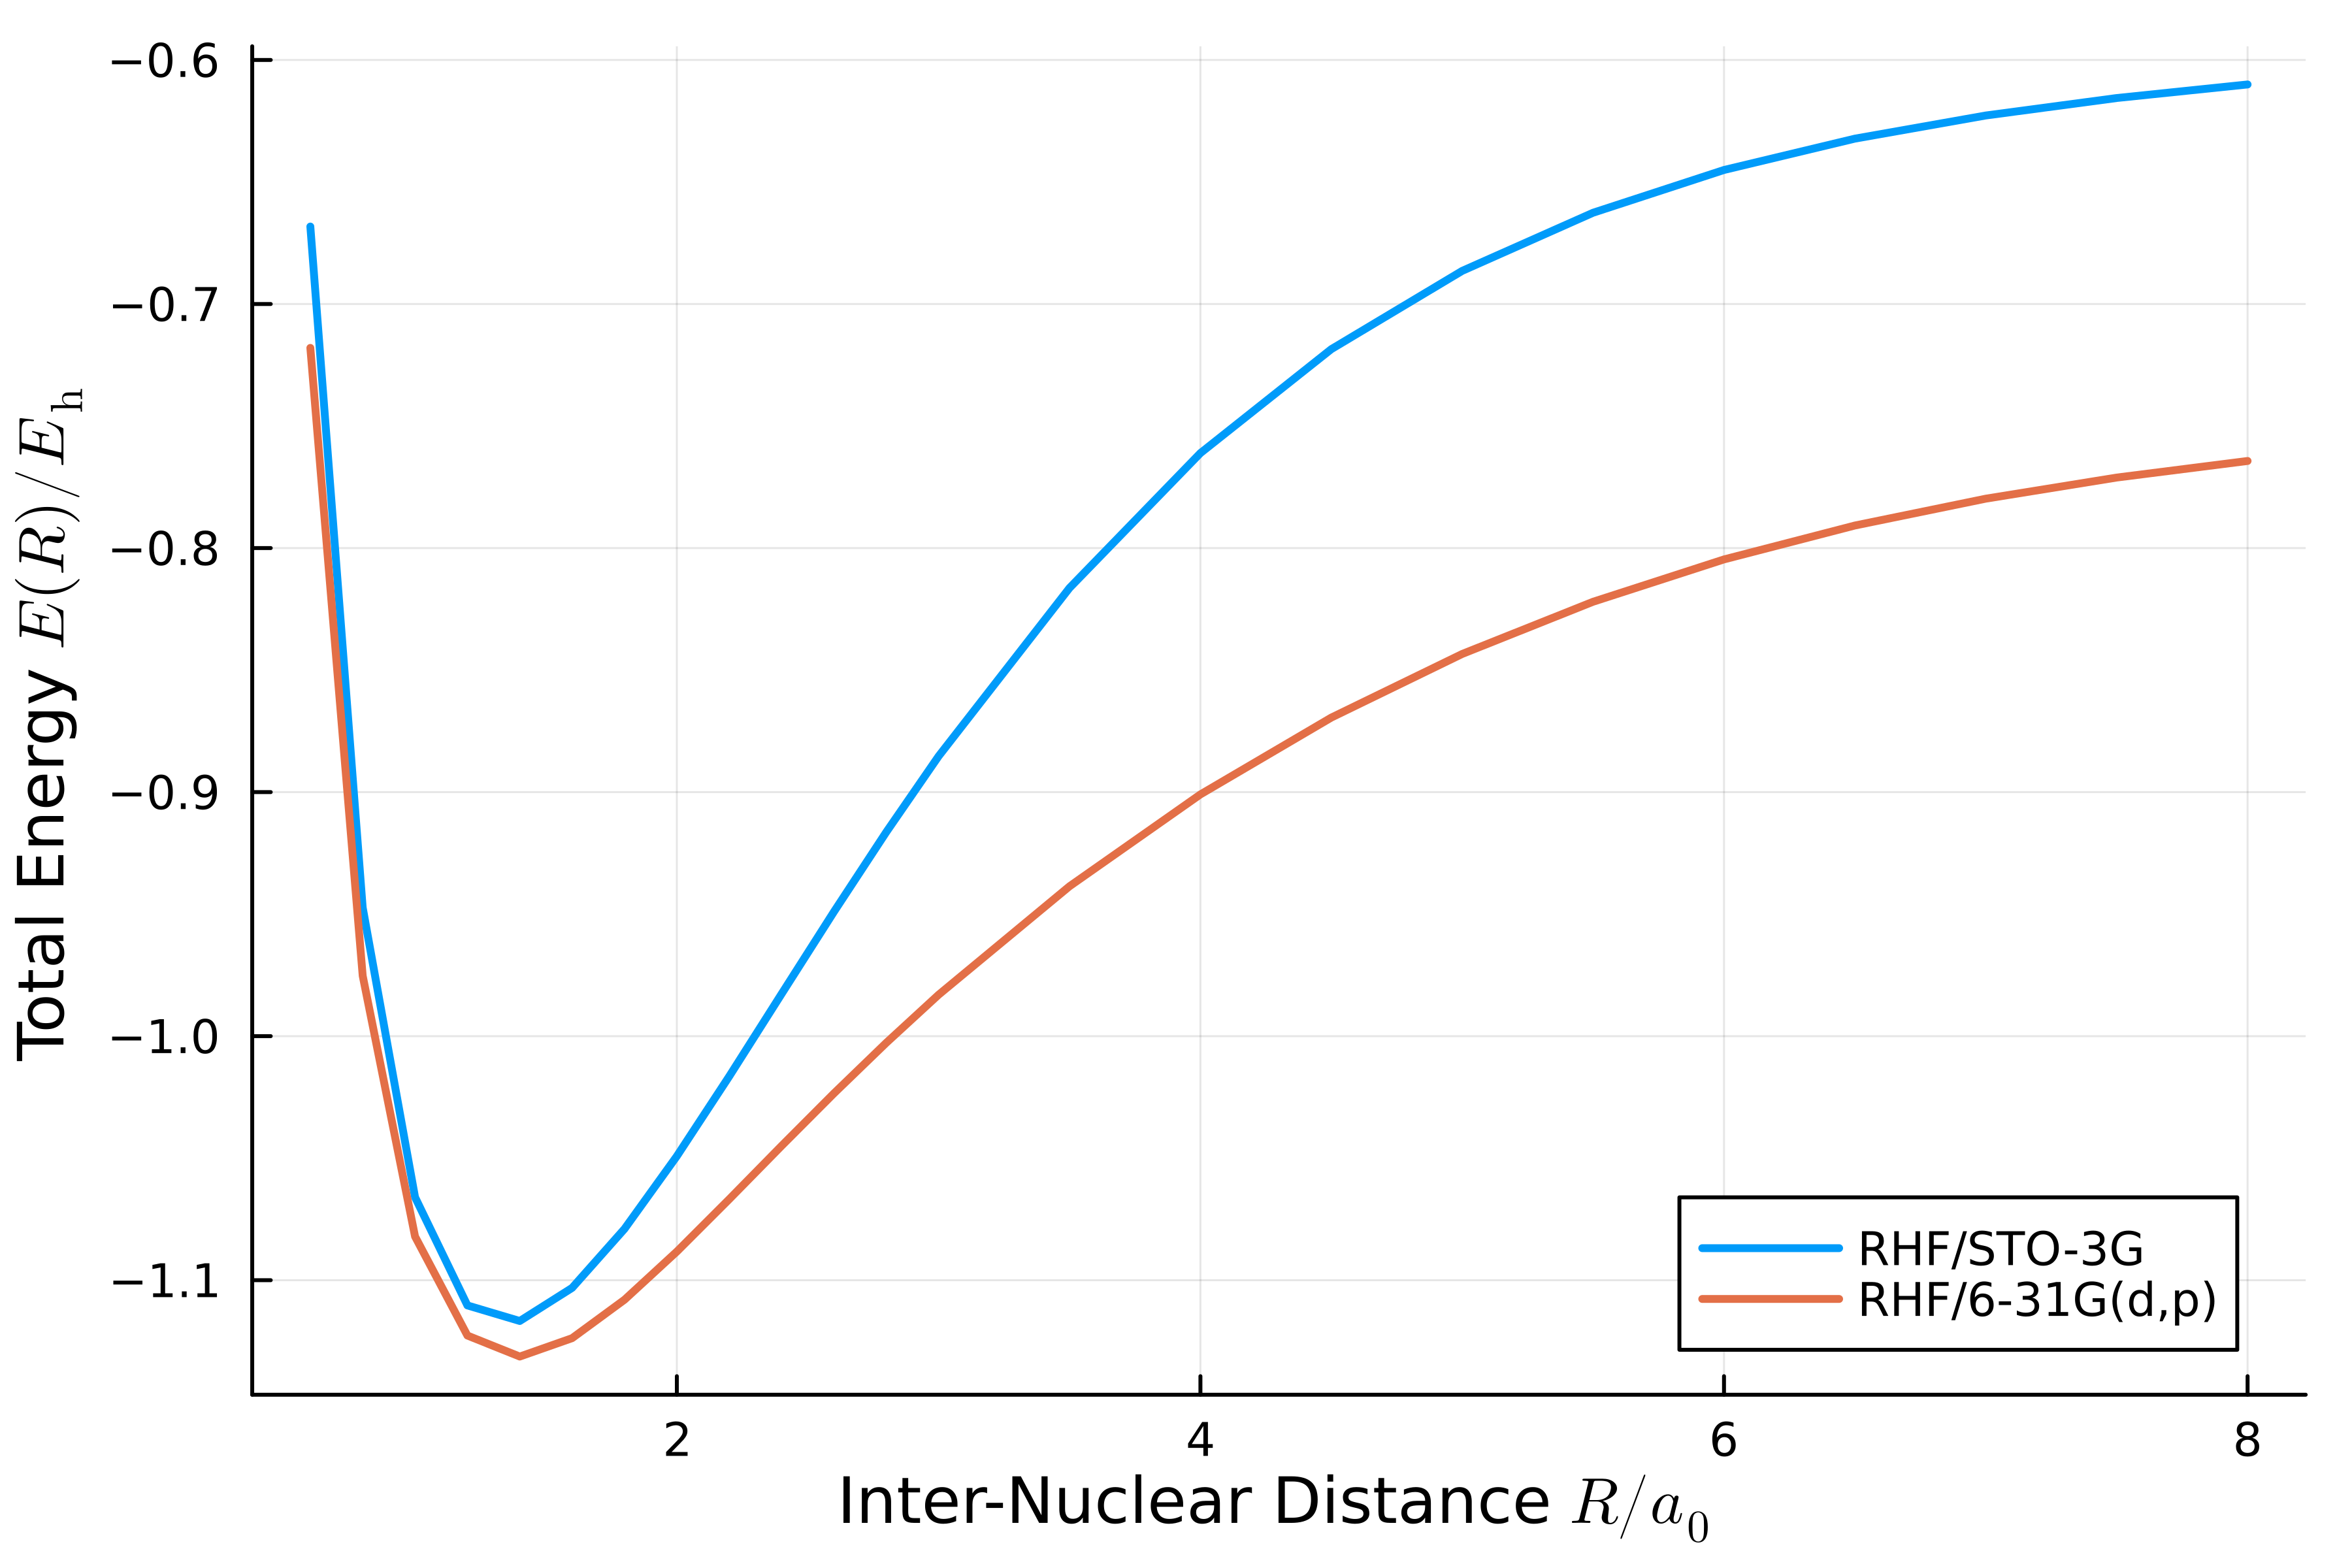

In [12]:
# plot
plot(xlabel=raw"Inter-Nuclear Distance $R / a_0$", ylabel=raw"Total Energy $E(R) / E_\mathrm{h}$", fmt=:png, dpi=600)

for method in ["RHF"]
    for basis in ["STO-3G" "6-31G(d,p)"]
        
        # reset
        X = []
        Y = []
        
        # loop for each distance
        for x in union(0.6:0.2:3, 3:0.5:8)

            # file name
            s = @sprintf("%.1f", x)
            name = "./PEC/H2/$(method)/$(basis)/R=$(s)"

            # generating input file
            GaussDrive.write("$name.gjf",
            """# $(method)/$(basis) units=au geom=nocrowd

            H2

            0  1
            H  0.0  0.0  0.0
            H  0.0  0.0  $(s)


            """)

            # run
            GaussDrive.run("$name.gjf")

            # result
            y = GaussDrive.energy("$name.out")
            push!(X, x)
            push!(Y, y)
            println(x, "\t", y)

        end
        
        # plot
        plot!(X, Y, lw=2, label="$method/$basis")

    end
end

# plot
plot!() |> display

g16.exe ./PEC/H2/RHF/aug-cc-pVTZ/atom.gjf > already done
atom	-0.499821176024
g16.exe ./PEC/H2/RHF/aug-cc-pVTZ/R=0.6.gjf > already done
0.6	-0.725306391026
g16.exe ./PEC/H2/RHF/aug-cc-pVTZ/R=0.7.gjf > already done
0.7	-0.879265737752
g16.exe ./PEC/H2/RHF/aug-cc-pVTZ/R=0.8.gjf > already done
0.8	-0.978345049871
g16.exe ./PEC/H2/RHF/aug-cc-pVTZ/R=0.9.gjf > already done
0.9	-1.04259578643
g16.exe ./PEC/H2/RHF/aug-cc-pVTZ/R=1.0.gjf > already done
1.0	-1.08384712161
g16.exe ./PEC/H2/RHF/aug-cc-pVTZ/R=1.1.gjf > already done
1.1	-1.10946251654
g16.exe ./PEC/H2/RHF/aug-cc-pVTZ/R=1.2.gjf > already done
1.2	-1.12422484452
g16.exe ./PEC/H2/RHF/aug-cc-pVTZ/R=1.3.gjf > already done
1.3	-1.13134368726
g16.exe ./PEC/H2/RHF/aug-cc-pVTZ/R=1.4.gjf > already done
1.4	-1.13302684721
g16.exe ./PEC/H2/RHF/aug-cc-pVTZ/R=1.5.gjf > already done
1.5	-1.13082323309
g16.exe ./PEC/H2/RHF/aug-cc-pVTZ/R=1.6.gjf > already done
1.6	-1.12583771107
g16.exe ./PEC/H2/RHF/aug-cc-pVTZ/R=1.7.gjf > already done
1.7	-1.1188697

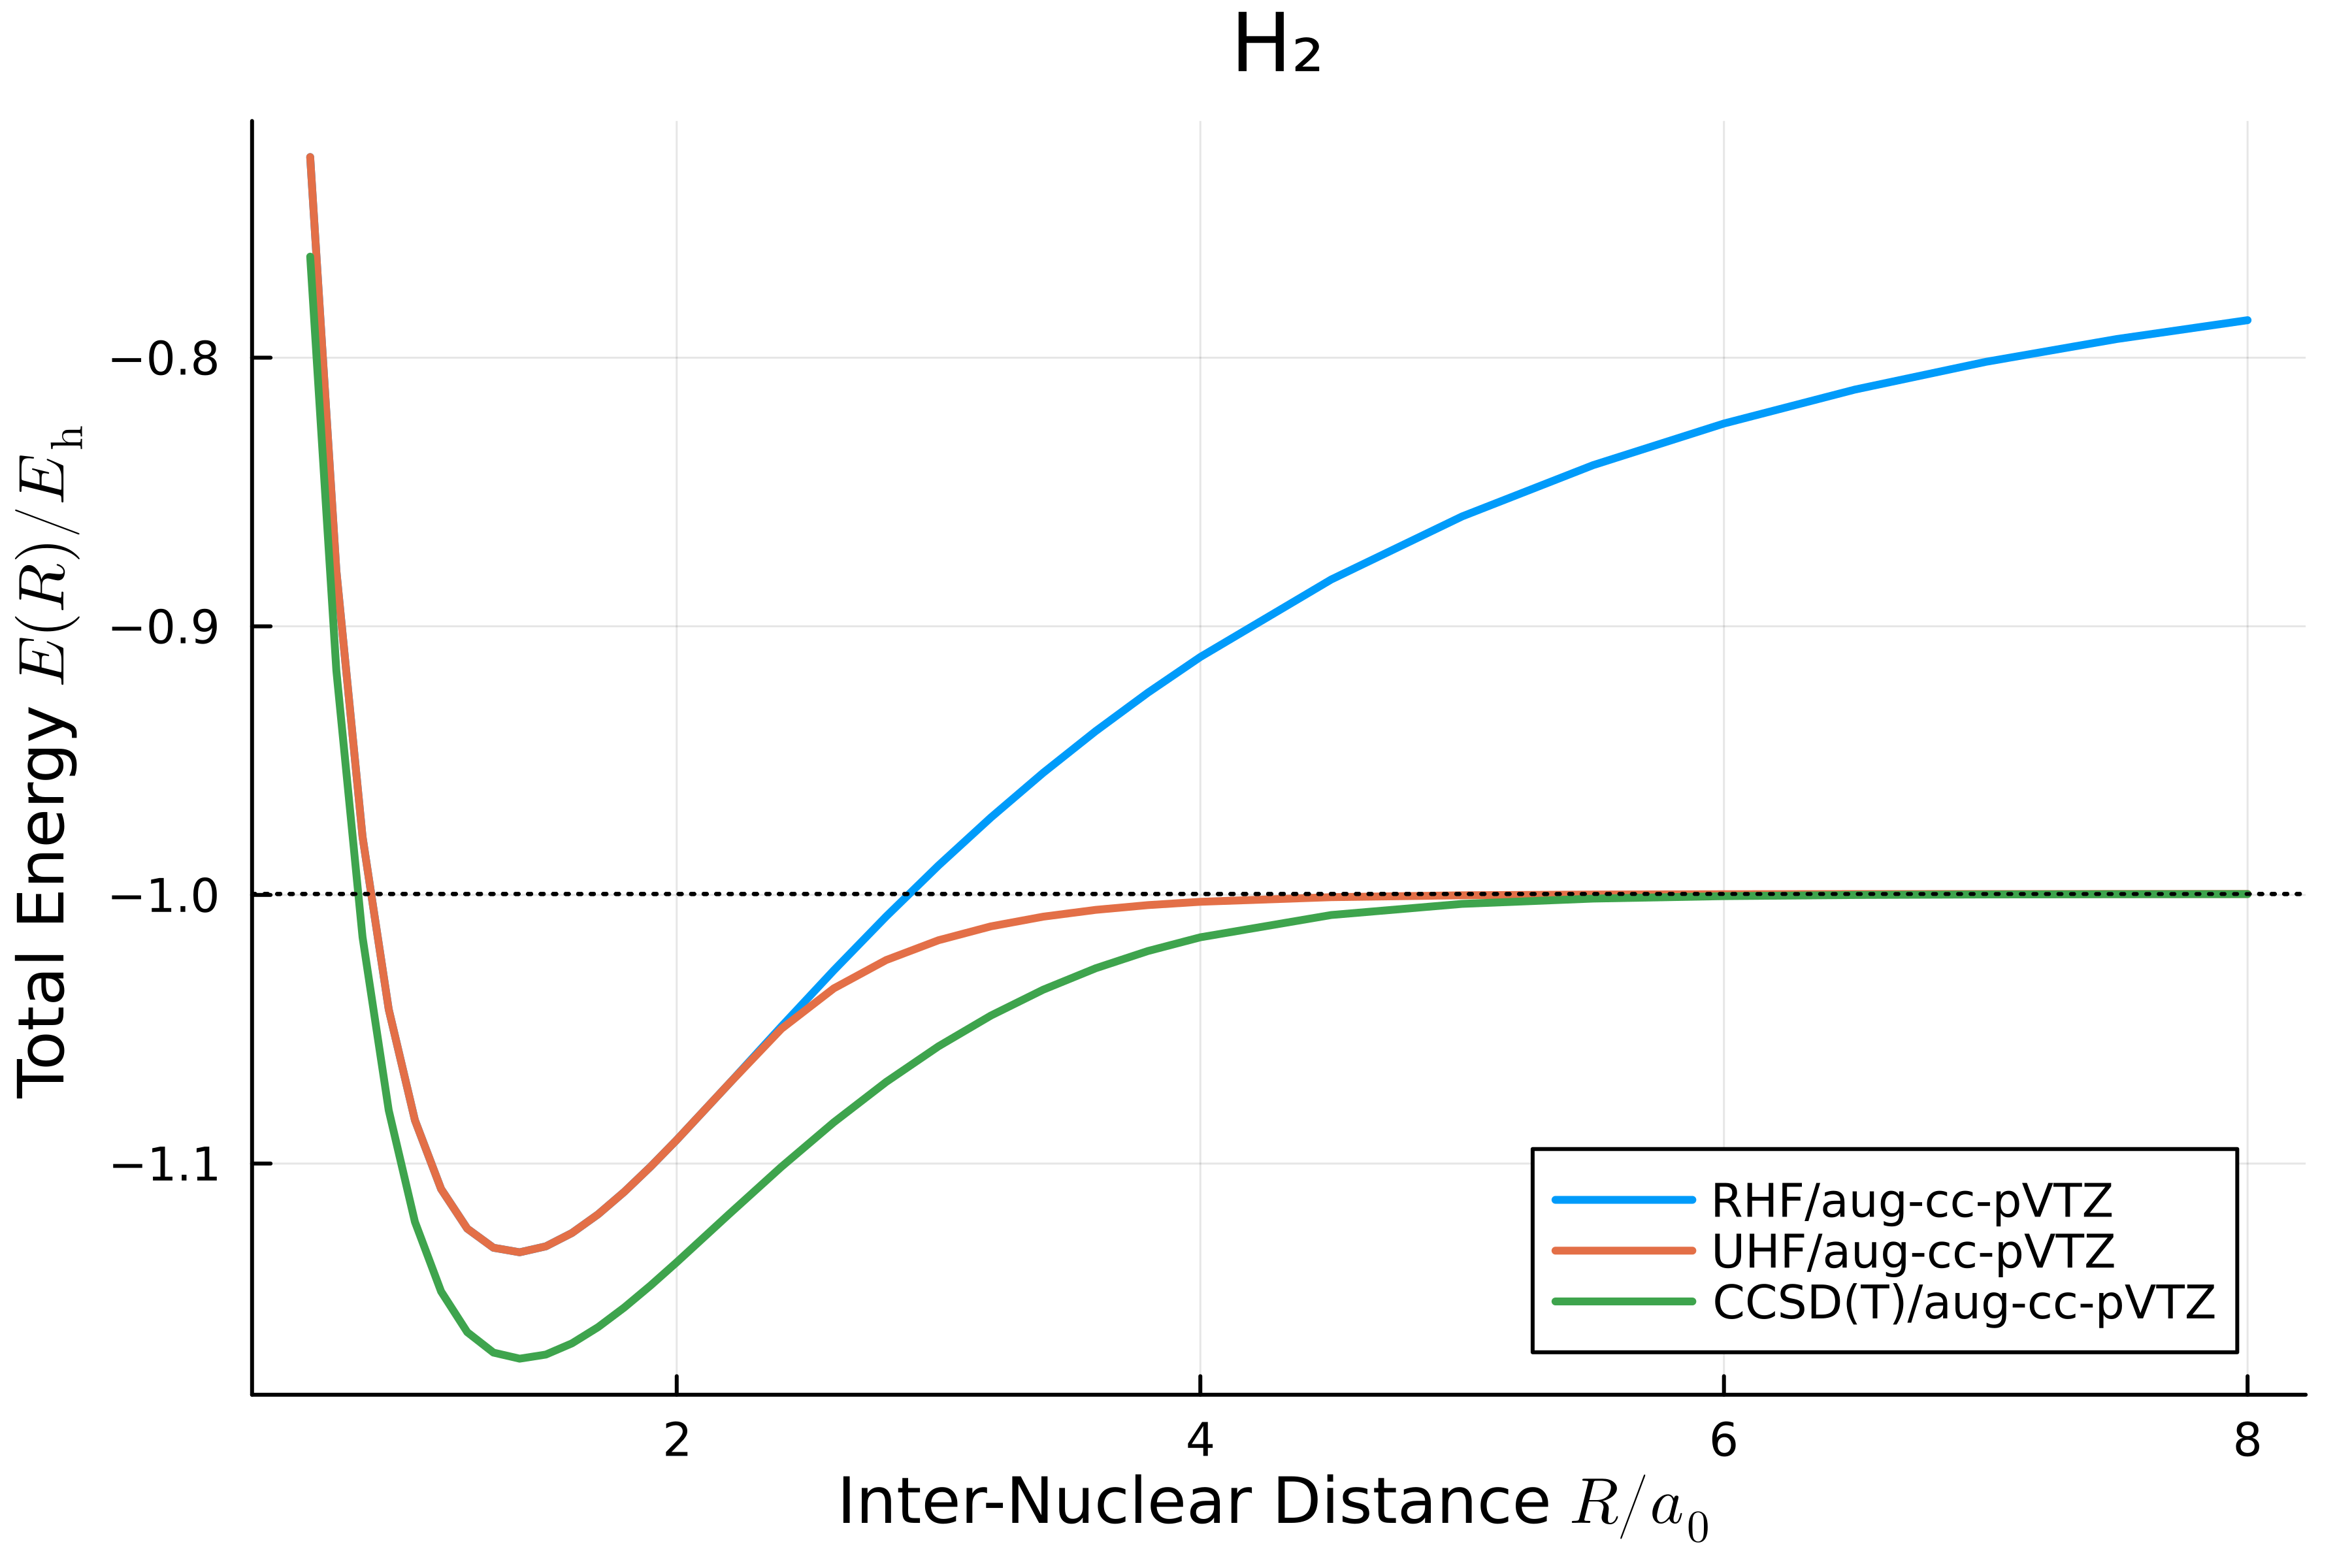

g16.exe ./PEC/Li2/RHF/aug-cc-pVTZ/atom.gjf > already done
atom	-7.43268212095
g16.exe ./PEC/Li2/RHF/aug-cc-pVTZ/R=2.0.gjf > already done
2.0	-14.6210675993
g16.exe ./PEC/Li2/RHF/aug-cc-pVTZ/R=2.2.gjf > already done
2.2	-14.6711409271
g16.exe ./PEC/Li2/RHF/aug-cc-pVTZ/R=2.4.gjf > already done
2.4	-14.7084902477
g16.exe ./PEC/Li2/RHF/aug-cc-pVTZ/R=2.6.gjf > already done
2.6	-14.7386378499
g16.exe ./PEC/Li2/RHF/aug-cc-pVTZ/R=2.8.gjf > already done
2.8	-14.7641652249
g16.exe ./PEC/Li2/RHF/aug-cc-pVTZ/R=3.0.gjf > already done
3.0	-14.7861312944
g16.exe ./PEC/Li2/RHF/aug-cc-pVTZ/R=3.2.gjf > already done
3.2	-14.8049350626
g16.exe ./PEC/Li2/RHF/aug-cc-pVTZ/R=3.4.gjf > already done
3.4	-14.8207818668
g16.exe ./PEC/Li2/RHF/aug-cc-pVTZ/R=3.6.gjf > already done
3.6	-14.8338775654
g16.exe ./PEC/Li2/RHF/aug-cc-pVTZ/R=3.8.gjf > already done
3.8	-14.8444742708
g16.exe ./PEC/Li2/RHF/aug-cc-pVTZ/R=4.0.gjf > already done
4.0	-14.8528572663
g16.exe ./PEC/Li2/RHF/aug-cc-pVTZ/R=4.2.gjf > already done
4.2	-

6.2	-14.896993962
g16.exe ./PEC/Li2/CCSD(T)/aug-cc-pVTZ/R=6.4.gjf > already done
6.4	-14.895080389
g16.exe ./PEC/Li2/CCSD(T)/aug-cc-pVTZ/R=6.6.gjf > already done
6.6	-14.893092183
g16.exe ./PEC/Li2/CCSD(T)/aug-cc-pVTZ/R=6.8.gjf > already done
6.8	-14.891071989
g16.exe ./PEC/Li2/CCSD(T)/aug-cc-pVTZ/R=7.0.gjf > already done
7.0	-14.889055481
g16.exe ./PEC/Li2/CCSD(T)/aug-cc-pVTZ/R=7.2.gjf > already done
7.2	-14.887072222
g16.exe ./PEC/Li2/CCSD(T)/aug-cc-pVTZ/R=7.4.gjf > already done
7.4	-14.885146475
g16.exe ./PEC/Li2/CCSD(T)/aug-cc-pVTZ/R=7.6.gjf > already done
7.6	-14.883297777
g16.exe ./PEC/Li2/CCSD(T)/aug-cc-pVTZ/R=7.8.gjf > already done
7.8	-14.88154138
g16.exe ./PEC/Li2/CCSD(T)/aug-cc-pVTZ/R=8.0.gjf > already done
8.0	-14.879888725
g16.exe ./PEC/Li2/CCSD(T)/aug-cc-pVTZ/R=9.0.gjf > already done
9.0	-14.873347266
g16.exe ./PEC/Li2/CCSD(T)/aug-cc-pVTZ/R=10.0.gjf > already done
10.0	-14.869469469
g16.exe ./PEC/Li2/CCSD(T)/aug-cc-pVTZ/R=11.0.gjf > already done
11.0	-14.867430565
g16.exe

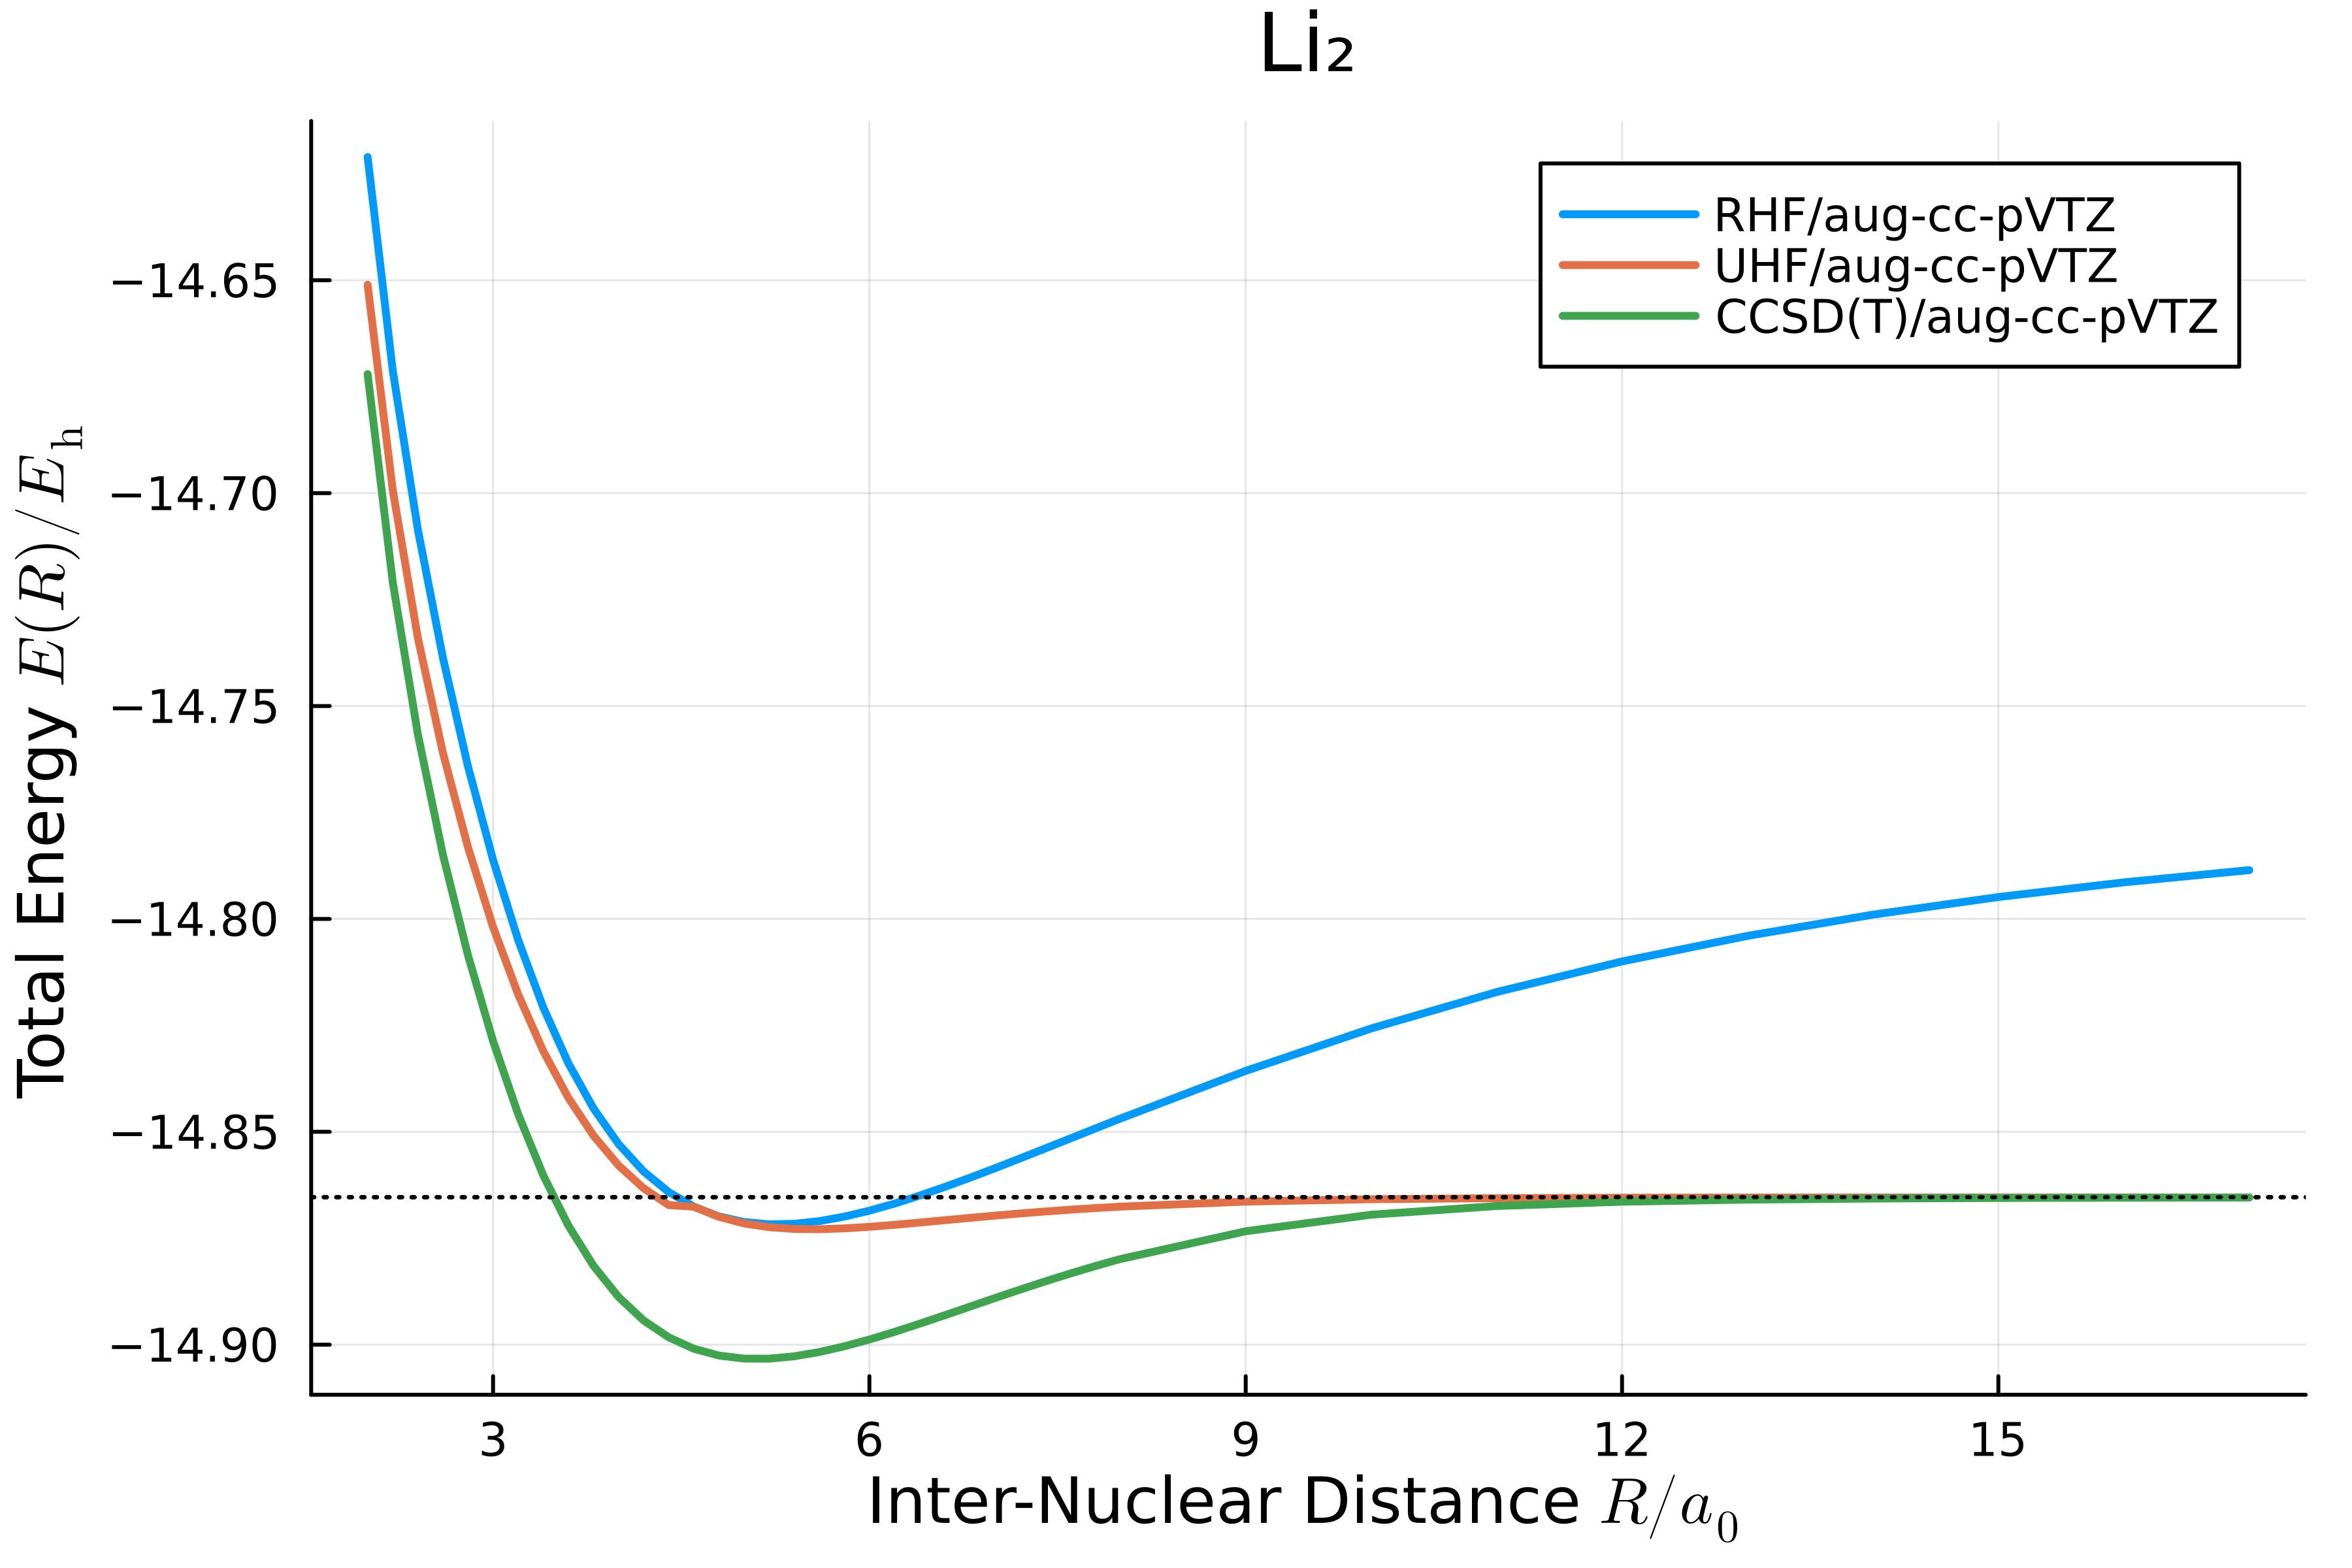

In [13]:
# RHF vs UHF

global X = []
global Y = []

for atom in ["H" "Li"]
for basis in ["aug-cc-pVTZ"] # ["aug-cc-pVDZ" "aug-cc-pVTZ" "aug-cc-pVQZ" "6-31G" "6-31G+" "6-31G(d,p)" "6-31G+(d,p)" "6-31G++(d,p)" "6-311G+(d,p)" "6-311G++(d,p)"]
    
    # plot
    global counter = 0
    plot(xlabel=raw"Inter-Nuclear Distance $R / a_0$", ylabel=raw"Total Energy $E(R) / E_\mathrm{h}$", title="$(atom)₂", fmt=:png, dpi=600)

    for method in ["RHF" "UHF" "CCSD(T)"]

        # reset
        global X = []
        global Y = []
            
        # atom
        name = "./PEC/$(atom)2/$(method)/$(basis)/atom"
        GaussDrive.write("$name.gjf",
        """# ROHF/$(basis)

        $(atom)

        0  2
        $(atom)  0.0  0.0  0.0


         """)
        GaussDrive.run("$name.gjf")
        y0 = GaussDrive.energy("$name.out")
        println("atom\t", y0)
        
        # loop for each distance
        for x in (atom=="Li" ? union(2.0:0.2:8, 8:1:17) : union(0.6:0.1:2, 2.2:0.2:3.8, 4.0:0.5:8.0))

            # file name
            s = @sprintf("%.1f", x)
            name = "./PEC/$(atom)2/$(method)/$(basis)/R=$(s)"

            # generating input file # Stable=Opt SCF=VeryTight
            GaussDrive.write("$name.gjf",
            """# $(method)/$(basis) units=au guess=mix geom=nocrowd

            $(atom)2

            0  1
            $(atom)  0.0  0.0  0.0
            $(atom)  0.0  0.0  $(s)


             """)

            # run
            GaussDrive.run("$name.gjf")

            # result
            y = GaussDrive.energy("$name.out")
            push!(X, x)
            push!(Y, y)
            println(x, "\t", y)

        end

        # plot
        global counter += 1
        plot!(X, Y, lw=2, lc=counter, label="$(method)/$(basis)")
        hline!([2*y0], lw=1, lc=:black, ls=:dot, label="")
    end
    plot!() |> display
end
end

## Dispersion

- He - He
- Ne - Ne

g16.exe ./PEC/He2/HF/aug-cc-pVTZ/atom.gjf > already done
2 E(He) = -5.72236685224
g16.exe ./PEC/He2/HF/aug-cc-pVTZ/R=2.2.gjf > already done
2.2	-5.72143316758
g16.exe ./PEC/He2/HF/aug-cc-pVTZ/R=2.3.gjf > already done
2.3	-5.72177255978
g16.exe ./PEC/He2/HF/aug-cc-pVTZ/R=2.4.gjf > already done
2.4	-5.72199040093
g16.exe ./PEC/He2/HF/aug-cc-pVTZ/R=2.5.gjf > already done
2.5	-5.72212940179
g16.exe ./PEC/He2/HF/aug-cc-pVTZ/R=2.6.gjf > already done
2.6	-5.72221749421
g16.exe ./PEC/He2/HF/aug-cc-pVTZ/R=2.7.gjf > already done
2.7	-5.72227296784
g16.exe ./PEC/He2/HF/aug-cc-pVTZ/R=2.8.gjf > already done
2.8	-5.72230778395
g16.exe ./PEC/He2/HF/aug-cc-pVTZ/R=2.9.gjf > already done
2.9	-5.72232969132
g16.exe ./PEC/He2/HF/aug-cc-pVTZ/R=3.0.gjf > already done
3.0	-5.72234360757
g16.exe ./PEC/He2/HF/aug-cc-pVTZ/R=3.1.gjf > already done
3.1	-5.72235256593
g16.exe ./PEC/He2/HF/aug-cc-pVTZ/R=3.2.gjf > already done
3.2	-5.72235838899
g16.exe ./PEC/He2/HF/aug-cc-pVTZ/R=3.3.gjf > already done
3.3	-5.722362

3.3	-5.80182364332
g16.exe ./PEC/He2/CAM-B3LYP/aug-cc-pVTZ/R=3.4.gjf > already done
3.4	-5.8018226852
g16.exe ./PEC/He2/CAM-B3LYP/aug-cc-pVTZ/R=3.5.gjf > already done
3.5	-5.80182218007
g16.exe ./PEC/He2/CAM-B3LYP/aug-cc-pVTZ/R=3.6.gjf > already done
3.6	-5.80182211193
g16.exe ./PEC/He2/CAM-B3LYP/aug-cc-pVTZ/R=3.7.gjf > already done
3.7	-5.80182297024
g16.exe ./PEC/He2/CAM-B3LYP/aug-cc-pVTZ/R=3.8.gjf > already done
3.8	-5.80182422485
g16.exe ./PEC/He2/CAM-B3LYP/aug-cc-pVTZ/R=3.9.gjf > already done
3.9	-5.80182498034
g16.exe ./PEC/He2/CAM-B3LYP/aug-cc-pVTZ/R=4.0.gjf > already done
4.0	-5.80182577931
g16.exe ./PEC/He2/CAM-B3LYP/aug-cc-pVTZ/R=4.1.gjf > already done
4.1	-5.80182701646
g16.exe ./PEC/He2/CAM-B3LYP/aug-cc-pVTZ/R=4.2.gjf > already done
4.2	-5.80182826114
g16.exe ./PEC/He2/CAM-B3LYP/aug-cc-pVTZ/R=4.3.gjf > already done
4.3	-5.80182887002
g16.exe ./PEC/He2/CAM-B3LYP/aug-cc-pVTZ/R=4.4.gjf > already done
4.4	-5.80182917718
g16.exe ./PEC/He2/CAM-B3LYP/aug-cc-pVTZ/R=4.5.gjf > alread

4.2	-5.79187908754
g16.exe ./PEC/He2/HSEH1PBE/aug-cc-pVTZ/R=4.3.gjf > already done
4.3	-5.7918780582
g16.exe ./PEC/He2/HSEH1PBE/aug-cc-pVTZ/R=4.4.gjf > already done
4.4	-5.79187700294
g16.exe ./PEC/He2/HSEH1PBE/aug-cc-pVTZ/R=4.5.gjf > already done
4.5	-5.79187635994
g16.exe ./PEC/He2/HSEH1PBE/aug-cc-pVTZ/R=4.6.gjf > already done
4.6	-5.7918762914
g16.exe ./PEC/He2/HSEH1PBE/aug-cc-pVTZ/R=4.7.gjf > already done
4.7	-5.79187630786
g16.exe ./PEC/He2/HSEH1PBE/aug-cc-pVTZ/R=4.8.gjf > already done
4.8	-5.79187603211
g16.exe ./PEC/He2/HSEH1PBE/aug-cc-pVTZ/R=4.9.gjf > already done
4.9	-5.79187553579
g16.exe ./PEC/He2/HSEH1PBE/aug-cc-pVTZ/R=5.0.gjf > already done
5.0	-5.79187521138
g16.exe ./PEC/He2/APFD/aug-cc-pVTZ/atom.gjf > already done
2 E(He) = -5.80090211862
g16.exe ./PEC/He2/APFD/aug-cc-pVTZ/R=2.2.gjf > already done
2.2	-5.8002571554
g16.exe ./PEC/He2/APFD/aug-cc-pVTZ/R=2.3.gjf > already done
2.3	-5.80055681271
g16.exe ./PEC/He2/APFD/aug-cc-pVTZ/R=2.4.gjf > already done
2.4	-5.80073370902

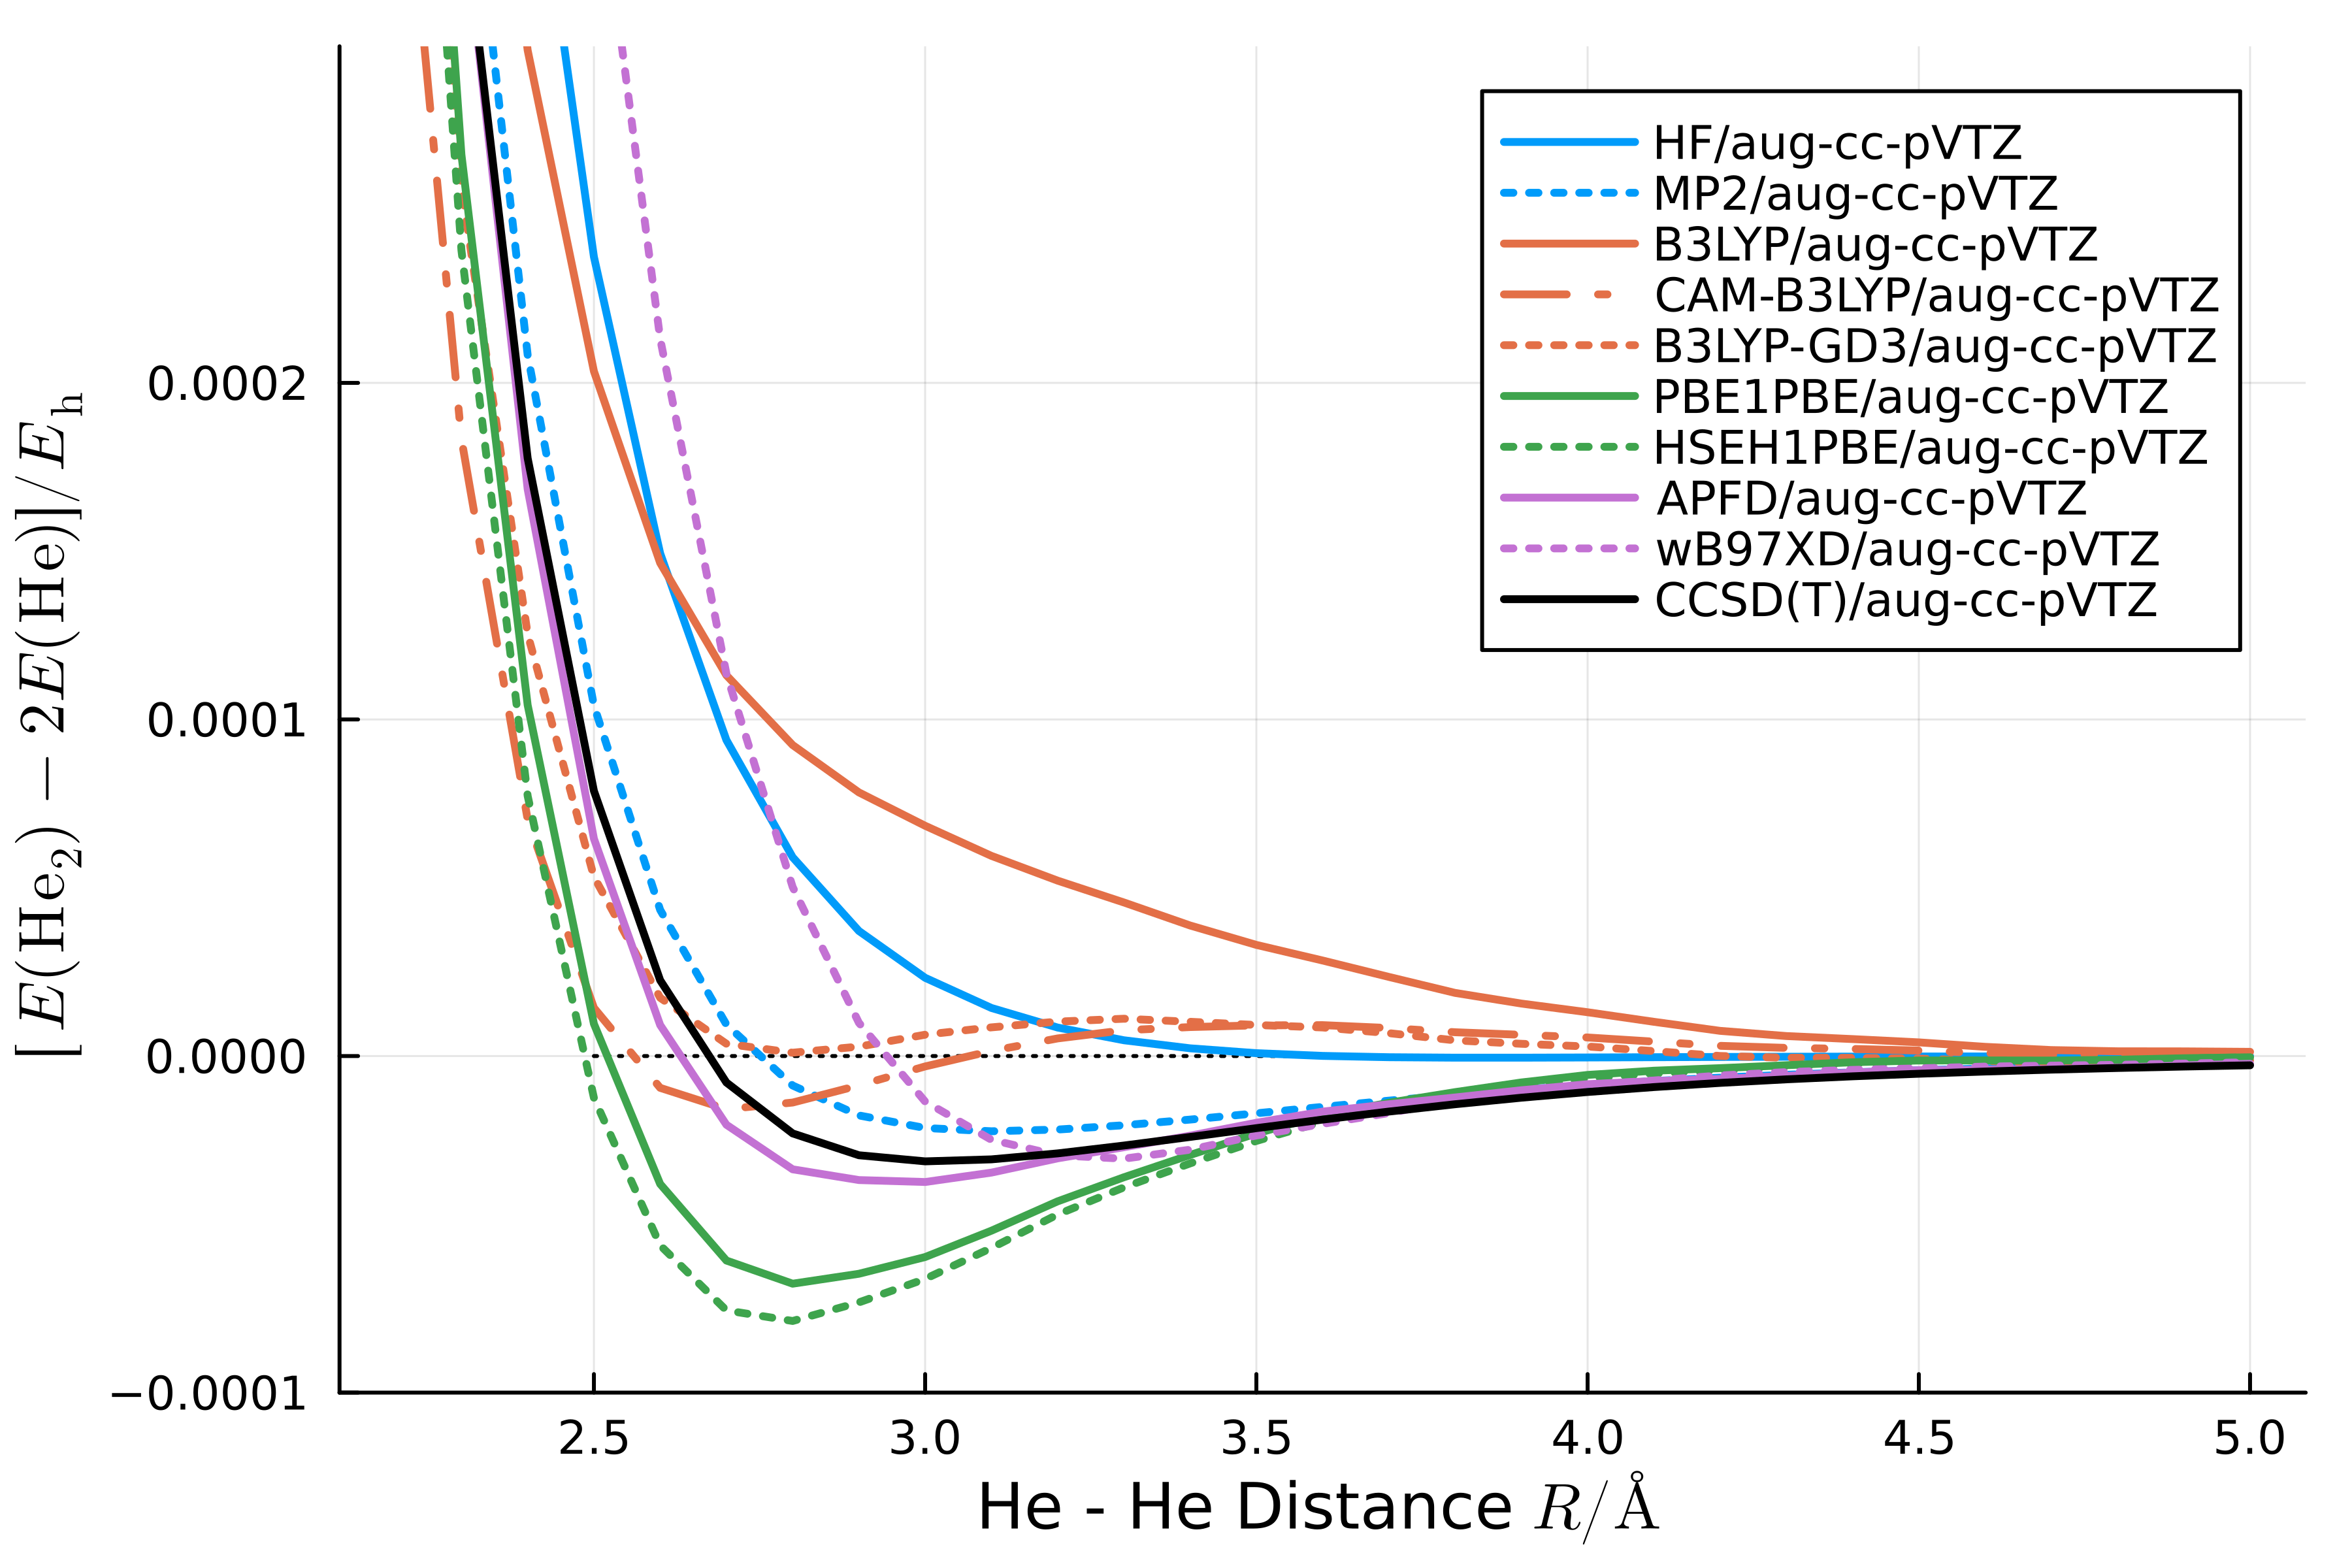

g16.exe ./PEC/Ne2/HF/aug-cc-pVTZ/atom.gjf > already done
2 E(Ne) = -257.06654564
g16.exe ./PEC/Ne2/HF/aug-cc-pVTZ/R=2.5.gjf > already done
2.5	-257.065201694
g16.exe ./PEC/Ne2/HF/aug-cc-pVTZ/R=2.6.gjf > already done
2.6	-257.0657083
g16.exe ./PEC/Ne2/HF/aug-cc-pVTZ/R=2.7.gjf > already done
2.7	-257.066029928
g16.exe ./PEC/Ne2/HF/aug-cc-pVTZ/R=2.8.gjf > already done
2.8	-257.066236001
g16.exe ./PEC/Ne2/HF/aug-cc-pVTZ/R=2.9.gjf > already done
2.9	-257.066367741
g16.exe ./PEC/Ne2/HF/aug-cc-pVTZ/R=3.0.gjf > already done
3.0	-257.066450219
g16.exe ./PEC/Ne2/HF/aug-cc-pVTZ/R=3.1.gjf > already done
3.1	-257.06649973
g16.exe ./PEC/Ne2/HF/aug-cc-pVTZ/R=3.2.gjf > already done
3.2	-257.06652768
g16.exe ./PEC/Ne2/HF/aug-cc-pVTZ/R=3.3.gjf > already done
3.3	-257.066542278
g16.exe ./PEC/Ne2/HF/aug-cc-pVTZ/R=3.4.gjf > already done
3.4	-257.066549224
g16.exe ./PEC/Ne2/HF/aug-cc-pVTZ/R=3.5.gjf > already done
3.5	-257.066552154
g16.exe ./PEC/Ne2/HF/aug-cc-pVTZ/R=3.6.gjf > already done
3.6	-257.066553137

3.1	-257.887069575
g16.exe ./PEC/Ne2/CAM-B3LYP/aug-cc-pVTZ/R=3.2.gjf > already done
3.2	-257.887041459
g16.exe ./PEC/Ne2/CAM-B3LYP/aug-cc-pVTZ/R=3.3.gjf > already done
3.3	-257.887014866
g16.exe ./PEC/Ne2/CAM-B3LYP/aug-cc-pVTZ/R=3.4.gjf > already done
3.4	-257.88699305
g16.exe ./PEC/Ne2/CAM-B3LYP/aug-cc-pVTZ/R=3.5.gjf > already done
3.5	-257.886977893
g16.exe ./PEC/Ne2/CAM-B3LYP/aug-cc-pVTZ/R=3.6.gjf > already done
3.6	-257.886967605
g16.exe ./PEC/Ne2/CAM-B3LYP/aug-cc-pVTZ/R=3.7.gjf > already done
3.7	-257.886959476
g16.exe ./PEC/Ne2/CAM-B3LYP/aug-cc-pVTZ/R=3.8.gjf > already done
3.8	-257.886955979
g16.exe ./PEC/Ne2/CAM-B3LYP/aug-cc-pVTZ/R=3.9.gjf > already done
3.9	-257.886955712
g16.exe ./PEC/Ne2/CAM-B3LYP/aug-cc-pVTZ/R=4.0.gjf > already done
4.0	-257.886954246
g16.exe ./PEC/Ne2/CAM-B3LYP/aug-cc-pVTZ/R=4.1.gjf > already done
4.1	-257.886951744
g16.exe ./PEC/Ne2/CAM-B3LYP/aug-cc-pVTZ/R=4.2.gjf > already done
4.2	-257.886952227
g16.exe ./PEC/Ne2/CAM-B3LYP/aug-cc-pVTZ/R=4.3.gjf > alread

3.4	-257.737324127
g16.exe ./PEC/Ne2/HSEH1PBE/aug-cc-pVTZ/R=3.5.gjf > already done
3.5	-257.737308908
g16.exe ./PEC/Ne2/HSEH1PBE/aug-cc-pVTZ/R=3.6.gjf > already done
3.6	-257.737293303
g16.exe ./PEC/Ne2/HSEH1PBE/aug-cc-pVTZ/R=3.7.gjf > already done
3.7	-257.737278852
g16.exe ./PEC/Ne2/HSEH1PBE/aug-cc-pVTZ/R=3.8.gjf > already done
3.8	-257.737268759
g16.exe ./PEC/Ne2/HSEH1PBE/aug-cc-pVTZ/R=3.9.gjf > already done
3.9	-257.737262091
g16.exe ./PEC/Ne2/HSEH1PBE/aug-cc-pVTZ/R=4.0.gjf > already done
4.0	-257.737254624
g16.exe ./PEC/Ne2/HSEH1PBE/aug-cc-pVTZ/R=4.1.gjf > already done
4.1	-257.737246927
g16.exe ./PEC/Ne2/HSEH1PBE/aug-cc-pVTZ/R=4.2.gjf > already done
4.2	-257.737242762
g16.exe ./PEC/Ne2/HSEH1PBE/aug-cc-pVTZ/R=4.3.gjf > already done
4.3	-257.73724092
g16.exe ./PEC/Ne2/HSEH1PBE/aug-cc-pVTZ/R=4.4.gjf > already done
4.4	-257.737237994
g16.exe ./PEC/Ne2/HSEH1PBE/aug-cc-pVTZ/R=4.5.gjf > already done
4.5	-257.737233572
g16.exe ./PEC/Ne2/HSEH1PBE/aug-cc-pVTZ/R=4.6.gjf > already done
4.6	-

4.0	-257.62535848
g16.exe ./PEC/Ne2/CCSD(T)/aug-cc-pVTZ/R=4.1.gjf > already done
4.1	-257.62535004
g16.exe ./PEC/Ne2/CCSD(T)/aug-cc-pVTZ/R=4.2.gjf > already done
4.2	-257.62534258
g16.exe ./PEC/Ne2/CCSD(T)/aug-cc-pVTZ/R=4.3.gjf > already done
4.3	-257.62533603
g16.exe ./PEC/Ne2/CCSD(T)/aug-cc-pVTZ/R=4.4.gjf > already done
4.4	-257.62533034
g16.exe ./PEC/Ne2/CCSD(T)/aug-cc-pVTZ/R=4.5.gjf > already done
4.5	-257.62532542
g16.exe ./PEC/Ne2/CCSD(T)/aug-cc-pVTZ/R=4.6.gjf > already done
4.6	-257.62532119
g16.exe ./PEC/Ne2/CCSD(T)/aug-cc-pVTZ/R=4.7.gjf > already done
4.7	-257.62531756
g16.exe ./PEC/Ne2/CCSD(T)/aug-cc-pVTZ/R=4.8.gjf > already done
4.8	-257.62531446
g16.exe ./PEC/Ne2/CCSD(T)/aug-cc-pVTZ/R=4.9.gjf > already done
4.9	-257.6253118
g16.exe ./PEC/Ne2/CCSD(T)/aug-cc-pVTZ/R=5.0.gjf > already done
5.0	-257.62530953
g16.exe ./PEC/Ne2/CCSD(T)/aug-cc-pVTZ/R=5.1.gjf > already done
5.1	-257.62530758
g16.exe ./PEC/Ne2/CCSD(T)/aug-cc-pVTZ/R=5.2.gjf > already done
5.2	-257.62530592
g16.exe ./P

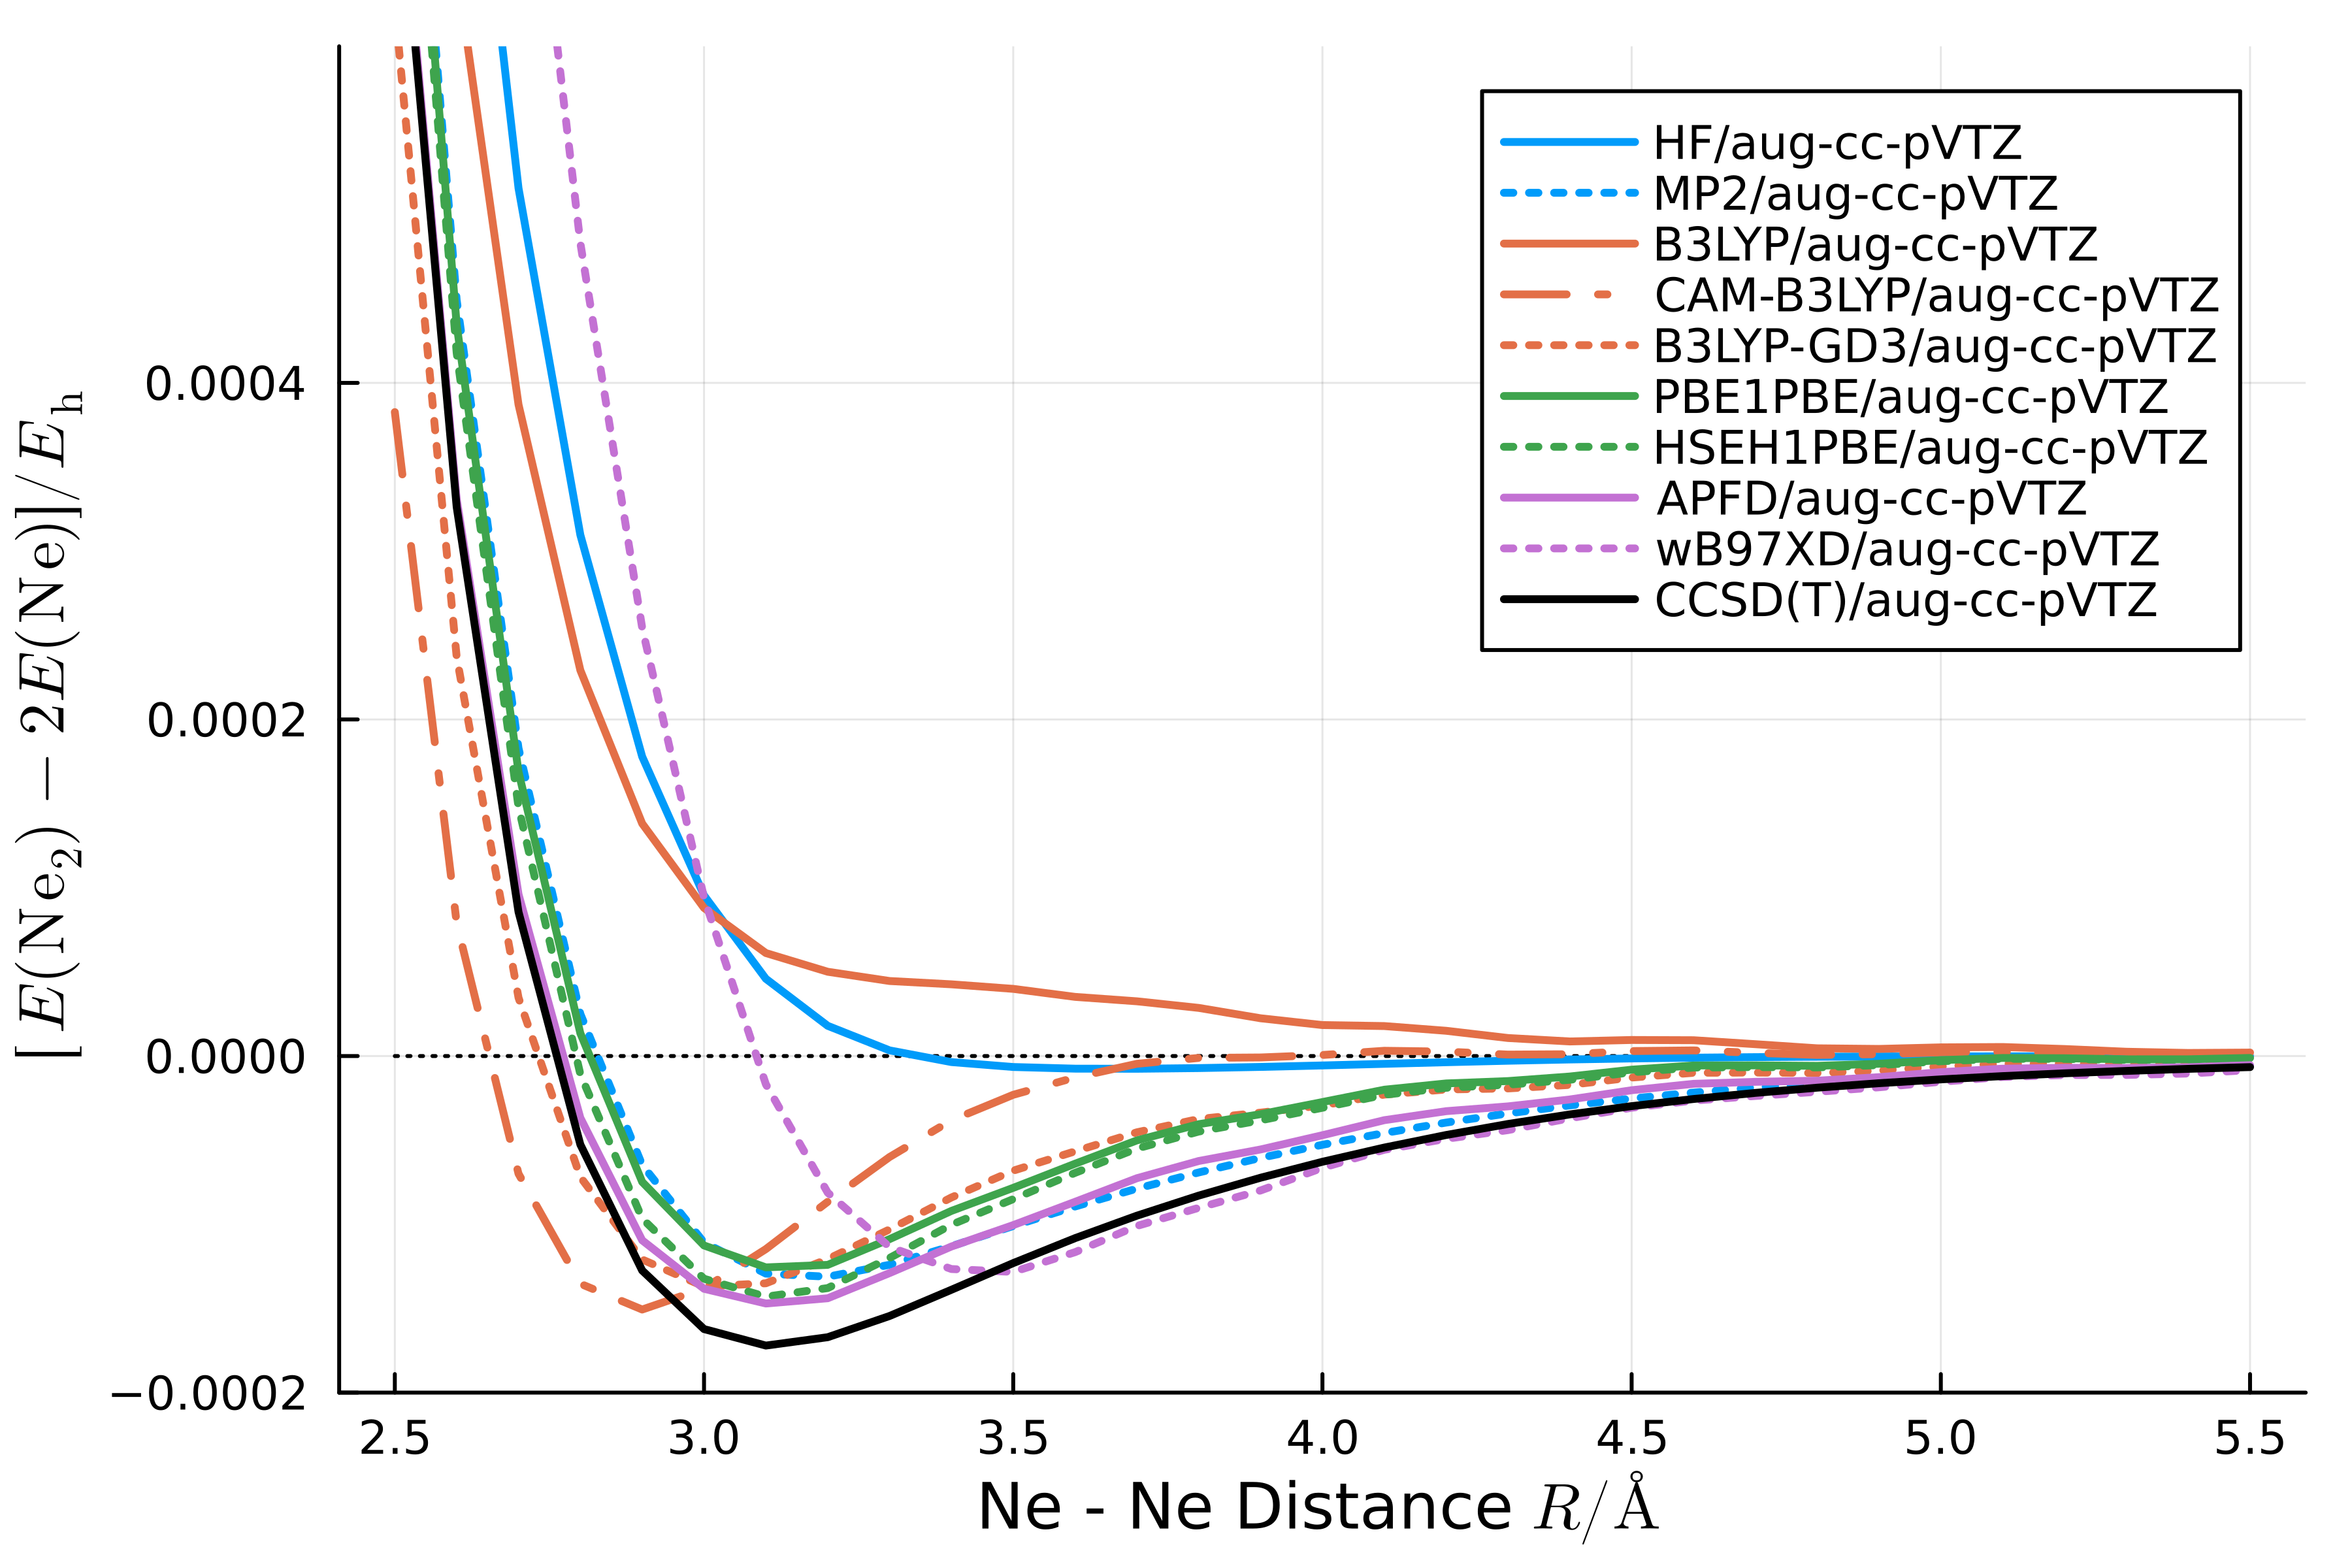

In [14]:
# # packages
# using Markdown
# using Printf
# include("../GaussDrive.jl")
# cd(dirname(@__FILE__))

# configuration
basis = "aug-cc-pVTZ"

for atom in ["He" "Ne"]
    plot(title="", xlabel="$(atom) - $(atom) Distance \$R / Å\$", ylabel="\$\\left[ E(\\mathrm{$(atom)}_2) - 2 E(\\mathrm{$(atom)}) \\right] / E_\\mathrm{h}\$", fmt=:png, dpi=600, ylims = (atom=="He" ? (-0.0001,0.0003) : (-0.0002,0.0006)) )
    plot!([2.5,5], [0,0], lc=:black, lw=1, ls=:dot, label="")
    global counter = 0
    for method in ["HF" "MP2" "B3LYP" "CAM-B3LYP" "B3LYP-GD3" "PBE1PBE" "HSEH1PBE" "APFD" "wB97XD" "CCSD(T)"] # "SVWN" "BLYP"

        # file name
        name = "./PEC/$(atom)2/$(method)/$(basis)/atom"

        # generating input file
        GaussDrive.write("$name.gjf", 
        """# $(method=="B3LYP-GD3" ? "B3LYP" : method)/$(basis) $(method=="B3LYP-GD3" ? "EmpiricalDispersion=GD3" : "")

        $(atom)

        0 1
        $(atom)  0.0  0.0  0.0


        """)

        # run
        GaussDrive.run("$name.gjf")

        # result
        y0 = 2 * GaussDrive.energy("$name.out")
        println("2 E($atom) = ", y0)
        
        # reset
        X = []
        Y = []

        # calculation 
        for x in (atom=="He" ? (2.2:0.1:5.0) : (2.5:0.1:5.5))

            # file name
            s = @sprintf("%.1f", x)
            name = "./PEC/$(atom)2/$(method)/$(basis)/R=$(s)"

            # generating input file
            GaussDrive.write("$name.gjf", 
            """# $(method=="B3LYP-GD3" ? "B3LYP" : method)/$(basis) $(method=="B3LYP-GD3" ? "EmpiricalDispersion=GD3" : "")

            $(atom) - $(atom)
            
            0  1
            $(atom)  0.0  0.0  0.0
            $(atom)  0.0  0.0  $(x)


            """)

            # run
            GaussDrive.run("$name.gjf")
            
            # result
            y = GaussDrive.energy("$name.out")
            push!(X, x)
            push!(Y, y)
            println(x, "\t", y)

        end

        # plot
        if method∈["MP2" "BLYP" "B3LYP-GD3" "HSEH1PBE" "wB97XD"]
            plot!(X, Y .- y0, lw=2, lc=counter, label="$(method)/$(basis)", ls=:dot)
        elseif method∈["CAM-B3LYP"]
            plot!(X, Y .- y0, lw=2, lc=counter, label="$(method)/$(basis)", ls=:dashdot)
        elseif method∈["CCSD(T)"]
            plot!(X, Y .- y0, lw=2, lc=:black, label="$(method)/$(basis)", ls=:solid)
        else
            global counter += 1
            plot!(X, Y .- y0, lw=2, lc=counter, label="$(method)/$(basis)", ls=:solid)
        end

    end
    
    plot!() |> display
    
end

N₂ - N₂

g16.exe ./PEC/(N2)2/HF/aug-cc-pVTZ/monomer.gjf > already done
2 E(N2) = -217.965763584
3.0	-217.961078305
3.1	-217.962457756
3.2	-217.963439477
3.3	-217.964133904
3.4	-217.964622145
3.5	-217.964963796
3.6	-217.965202332
3.7	-217.965369016
3.8	-217.965485925
3.9	-217.965568374
4.0	-217.965626851
4.2	-217.965698224
4.4	-217.965734386
4.6	-217.965752187
4.8	-217.965760421
5.0	-217.965763852
5.2	-217.965765015
5.4	-217.965765145
5.6	-217.965764785
5.8	-217.965764174
6.0	-217.96576346
6.5	-217.965761938
7.0	-217.965761335
7.5	-217.965761418
g16.exe ./PEC/(N2)2/MP2/aug-cc-pVTZ/monomer.gjf > already done
2 E(N2) = -218.72929731954
3.0	-218.72859274312
3.1	-218.72927135637
3.2	-218.72968385662
3.3	-218.72991494893
3.4	-218.73002503767
3.5	-218.73005713873
3.6	-218.73004148127
3.7	-218.72999880794
3.8	-218.72994284296
3.9	-218.72988225183
4.0	-218.7298221921
4.2	-218.72971351824
4.4	-218.72962507487
4.6	-218.72955578276
4.8	-218.72950207527
5.0	-218.72946038839
5.2	-218.72942782582
5.4	-218.729

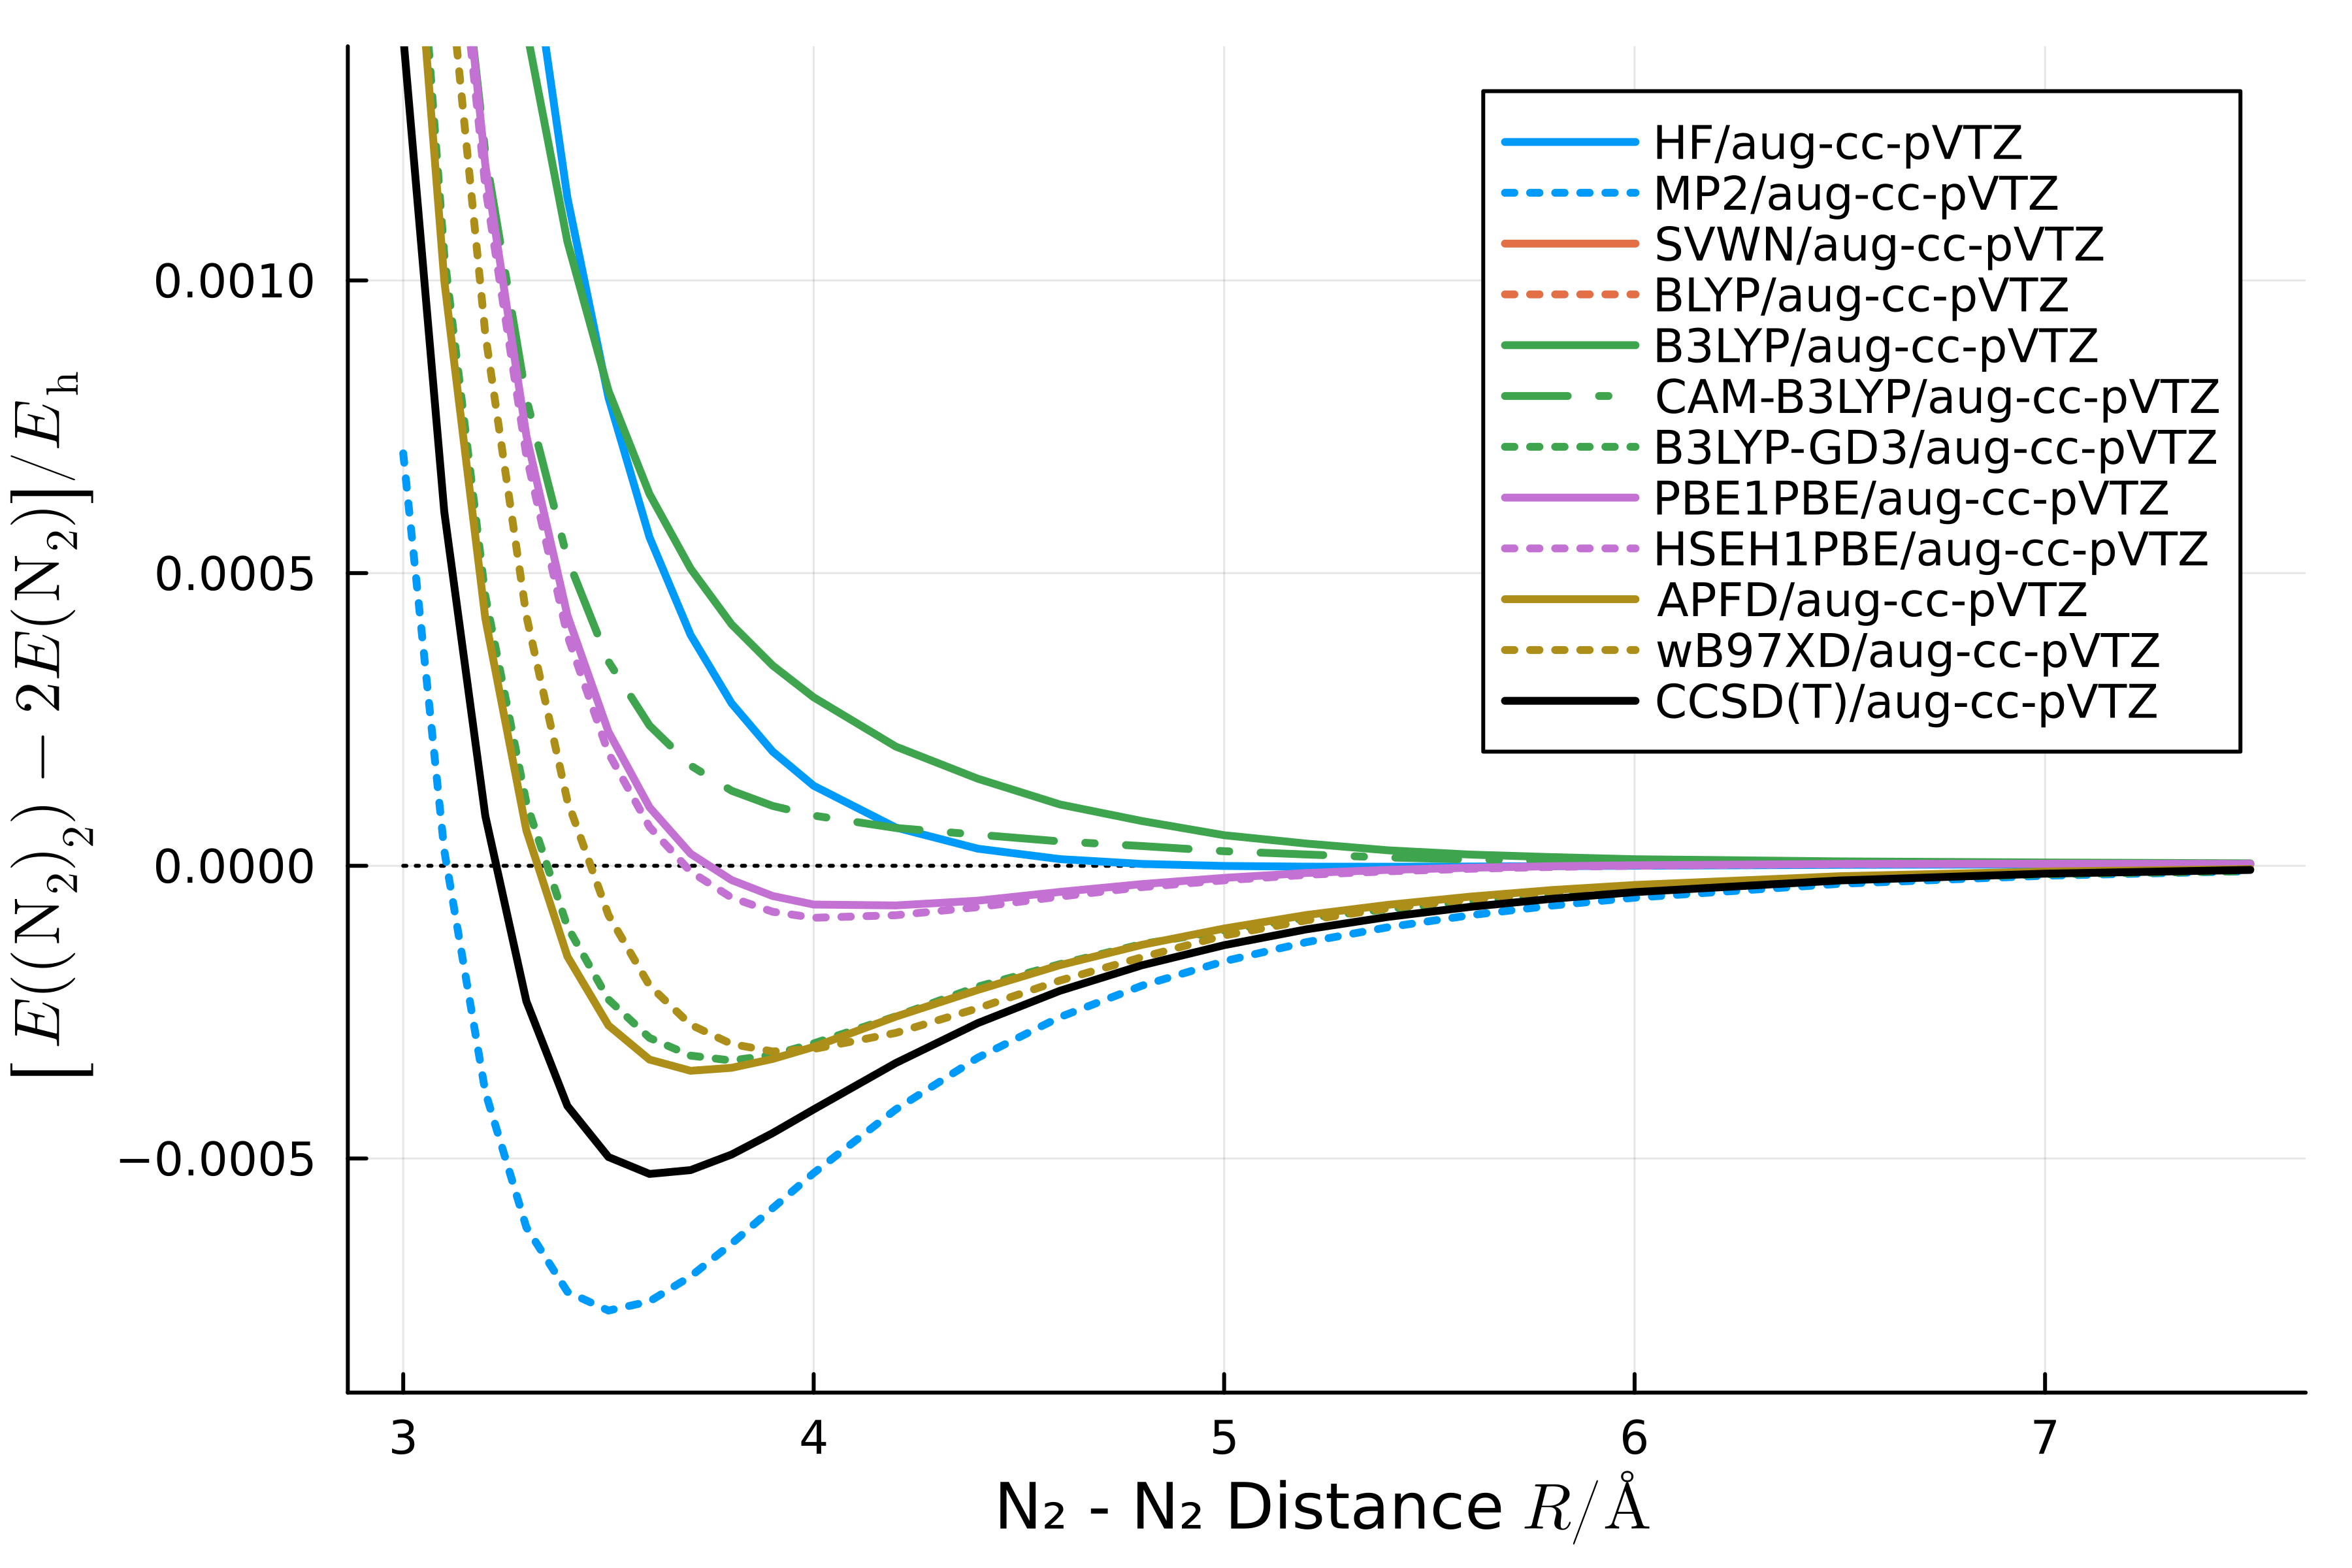

In [15]:
# # packages
# using Markdown
# using Printf
# include("../GaussDrive.jl")
# cd(dirname(@__FILE__))

# configuration
basis = "aug-cc-pVTZ"
monomer = "N2"
R_NN = 1.106
plot(title="", xlabel="N₂ - N₂ Distance \$R / Å\$", ylabel="\$\\left[ E((\\mathrm{N}_2)_2) - 2 E(\\mathrm{N}_2) \\right] / E_\\mathrm{h}\$", fmt=:png, dpi=600, ylims=(-0.0009,0.0014))
plot!([3,7.5], [0,0], lc=:black, lw=1, ls=:dot, label="")
global counter = 0

for method in ["HF" "MP2" "SVWN" "BLYP" "B3LYP" "CAM-B3LYP" "B3LYP-GD3" "PBE1PBE" "HSEH1PBE" "APFD" "wB97XD" "CCSD(T)"]
    
    # file name
    name = "./PEC/($(monomer))2/$(method)/$(basis)/monomer"

    # generating input file
    GaussDrive.write("$name.gjf", 
    """# $(method=="B3LYP-GD3" ? "B3LYP" : method)/$(basis) $(method==" B3LYP-GD3" ? "EmpiricalDispersion=GD3 " : "")

    $(monomer)

    0 1
    N  0.0  0.0  0.0
    N  0.0  0.0  $R_NN


    """)

    # run
    GaussDrive.run("$name.gjf")

    # result
    y0 = 2 * GaussDrive.energy("$name.out")
    println("2 E($monomer) = ", y0)
    # R_NN = GaussDrive.get("$name.out", r".*R\(1,2\)\s*(?<target>[+-]?\d+(?:\.\d+)?[ED]?[+-]?\d+)\s*.*\r")
    # @show R_NN

    # reset
    X = []
    Y = []

    # calculation 
    for x in [3.0:0.1:4.0..., 4.2:0.2:6.0..., 6.5:0.5:7.5...]

        # file name
        s = @sprintf("%.1f", x)
        name = "./PEC/($(monomer))2/$(method)/$(basis)/R=$(s)"

        # generating input file
        GaussDrive.write("$name.gjf", 
        """# $(method=="B3LYP-GD3" ? "B3LYP" : method)/$(basis) $(method=="B3LYP-GD3" ? "EmpiricalDispersion=GD3" : "")
        
        $(monomer) - $(monomer)
        
        0 1
        N  0.0  0.0  0.0
        N  0.0  0.0  $(x)
        N  0.0  $(R_NN)  0.0
        N  0.0  $(R_NN)  $(x)
        
        
        """)
        
        # run
        # GaussDrive.run("$name.gjf")

        # result
        y = GaussDrive.energy("$name.out")
        push!(X, x)
        push!(Y, y)
        println(x, "\t", y)

    end

    # plot
    if method∈["MP2" "BLYP" "B3LYP-GD3" "HSEH1PBE" "wB97XD"]
        plot!(X, Y .- y0, lw=2, lc=counter, label="$(method)/$(basis)", ls=:dot)
    elseif method∈["CAM-B3LYP"]
        plot!(X, Y .- y0, lw=2, lc=counter, label="$(method)/$(basis)", ls=:dashdot)
    elseif method∈["CCSD" "CCSD(T)"]
        plot!(X, Y .- y0, lw=2, lc=:black, label="$(method)/$(basis)", ls=:solid)
    else
        global counter += 1
        plot!(X, Y .- y0, lw=2, lc=counter, label="$(method)/$(basis)", ls=:solid)
    end
    
end

plot!() |> display

C6H6 - C6H6

In [16]:
# # # packages
# # using Markdown
# # using Printf
# # include("../GaussDrive.jl")
# # cd(dirname(@__FILE__))

# # configuration
# basis = "6-31++G(d,p)"
# monomer = "C6H6"
# R_CC = "1.4"
# R_CH = "1.1"
# plot(xlabel="C₆H₆ - C₆H₆ distance \$r_\\mathrm{PS}\$ / Å", ylabel="\$\\left[ E(\\mathrm{$(monomer)}_2) - 2 E(\\mathrm{$(monomer)}) \\right] / E_\\mathrm{h}\$", fmt=:png, dpi=600)
# plot!([4.3,8.0], [0,0], lc=:black, lw=1, ls=:dot, label="")
# global counter = 0

# for method in ["HF" "B3LYP" "B3LYP-GD3" "PBE1PBE" "HSEH1PBE" "APFD" "wB97XD" "CCSD(T)"]
    
#     # file name
#     name = "./PEC/($(monomer))2/$(method)/monomer"

#     # generating input file
#     GaussDrive.write("$name.gjf", 
#     """# $(method=="B3LYP-GD3" ? "B3LYP" : method)/$(basis)$(method=="B3LYP-GD3" ? " EmpiricalDispersion=GD3" : "")

#     $(monomer)

#     0  1
#     C              
#     C   1   B1
#     C   2   B1   1   A1
#     C   3   B1   2   A1   1   D1   0
#     C   4   B1   3   A1   2   D1   0
#     C   1   B1   2   A1   3   D1   0
#     H   1   B2   6   A1   5   D2   0
#     H   2   B2   1   A1   6   D3   0
#     H   3   B2   2   A1   1   D3   0
#     H   4   B2   3   A1   2   D2   0
#     H   5   B2   4   A1   3   D2   0
#     H   6   B2   1   A1   2   D3   0

#     B1      $(R_CC)
#     B2      $(R_CH)
#     A1    120.0
#     D1      0.0
#     D2   -180.0
#     D3    180.0


#     """)

#     # run
#     GaussDrive.run("$name.gjf")

#     # result
#     y0 = 2 * GaussDrive.energy("$name.out")
#     println("2 E($monomer) = ", y0)
#     # R_CC = GaussDrive.get("$name.out", r".*R\(1,2\)\s*(?<target>[+-]?\d+(?:\.\d+)?[ED]?[+-]?\d+)\s*.*\r")
#     # R_CH = GaussDrive.get("$name.out", r".*R\(1,7\)\s*(?<target>[+-]?\d+(?:\.\d+)?[ED]?[+-]?\d+)\s*.*\r")
#     # @show R_CC
#     # @show R_CH

#     # reset
#     X = []
#     Y = []

#     # calculation 
#     for x in [4.3:0.1:5.6..., 6.0:0.5:8.0...]

#         # file name
#         s = @sprintf("%.1f", x)
#         name = "./PEC/($(monomer))2/$(method)/R=$(s)"

#         # generating input file
#         GaussDrive.write("$name.gjf", 
#         """# $(method=="B3LYP-GD3" ? "B3LYP" : method)/$(basis) $(method=="B3LYP-GD3" ? "EmpiricalDispersion=GD3" : "")
        
#         $(monomer) -  $(monomer)
        
#         0  1
#         C    
#         C    1   B1
#         C    2   B1    1    A1
#         C    3   B1    2    A1    1    D1    0
#         C    4   B1    3    A1    2    D1    0
#         C    1   B1    2    A1    3    D1    0
#         H    1   B2    6    A1    5    D2    0
#         H    2   B2    1    A1    6    D3    0
#         H    3   B2    2    A1    1    D3    0
#         H    4   B2    3    A1    2    D2    0
#         H    5   B2    4    A1    3    D2    0
#         H    6   B2    1    A1    2    D3    0
#         C    6   B3    1    A2    2    D4    0
#         C   13   B1    6    A2    1    D1    0
#         C   14   B1    13   A1    6    D5    0
#         C   15   B1    14   A1    13   D1    0
#         C   16   B1    15   A1    14   D1    0
#         C   13   B1    6    A2    1    D6    0
#         H   13   B2    6    A2    1    D7    0
#         H   14   B2    13   A1    6    D4    0
#         H   15   B2    14   A1    13   D2    0
#         H   16   B2    15   A1    14   D2    0
#         H   17   B2    16   A1    15   D2    0
#         H   18   B2    13   A1    6    D5    0
        
#         B1      $(R_CC)
#         B2      $(R_CH)
#         B3      $x
#         A1    120.0
#         A2     90.0
#         D1      0.0
#         D2   -180.0
#         D3    180.0
#         D4    -90.0
#         D5     90.0
#         D6    120.0
#         D7   -120.0
        
            
#         """)
        
#         # run
#         GaussDrive.run("$name.gjf")

#         # result
#         y = GaussDrive.energy("$name.out")
#         push!(X, x)
#         push!(Y, y)
#         println(x, "\t", y)

#     end

#     # plot
#     if method∈["MP2" "B3LYP-GD3" "HSEH1PBE" "wB97XD"]
#         plot!(X, Y .- y0, lw=2, lc=counter, label="$(method)/$(basis)", ls=:dot) |> display
#     elseif method∈["CCSD(T)"]
#         plot!(X, Y .- y0, lw=2, lc=:black, label="$(method)/$(basis)", ls=:solid) |> display
#     else
#         global counter += 1
#         plot!(X, Y .- y0, lw=2, lc=counter, label="$(method)/$(basis)", ls=:solid) |> display
#     end
    
# end

## Singlet - Triplet

g16.exe ./PEC/O2/singlet/CCSD/aug-cc-pVTZ/R=1.80.gjf > already done
1.8	NaN
g16.exe ./PEC/O2/singlet/CCSD/aug-cc-pVTZ/R=1.90.gjf > already done
1.9	NaN
g16.exe ./PEC/O2/singlet/CCSD/aug-cc-pVTZ/R=2.00.gjf > already done
2.0	NaN
g16.exe ./PEC/O2/singlet/CCSD/aug-cc-pVTZ/R=2.10.gjf > already done
2.1	NaN
g16.exe ./PEC/O2/singlet/CCSD/aug-cc-pVTZ/R=2.20.gjf > already done
2.2	NaN
g16.exe ./PEC/O2/singlet/CCSD/aug-cc-pVTZ/R=2.30.gjf > already done
2.3	NaN
g16.exe ./PEC/O2/singlet/CCSD/aug-cc-pVTZ/R=2.40.gjf > already done
2.4	NaN
g16.exe ./PEC/O2/singlet/CCSD/aug-cc-pVTZ/R=2.50.gjf > already done
2.5	NaN
g16.exe ./PEC/O2/singlet/CCSD/aug-cc-pVTZ/R=2.60.gjf > already done
2.6	NaN
g16.exe ./PEC/O2/singlet/CCSD/aug-cc-pVTZ/R=2.70.gjf > already done
2.7	NaN
g16.exe ./PEC/O2/singlet/CCSD/aug-cc-pVTZ/R=2.80.gjf > already done
2.8	NaN
g16.exe ./PEC/O2/singlet/CCSD/aug-cc-pVTZ/R=2.90.gjf > already done
2.9	NaN
g16.exe ./PEC/O2/singlet/CCSD/aug-cc-pVTZ/R=3.00.gjf > already done
3.0	NaN
g16.exe ./PE

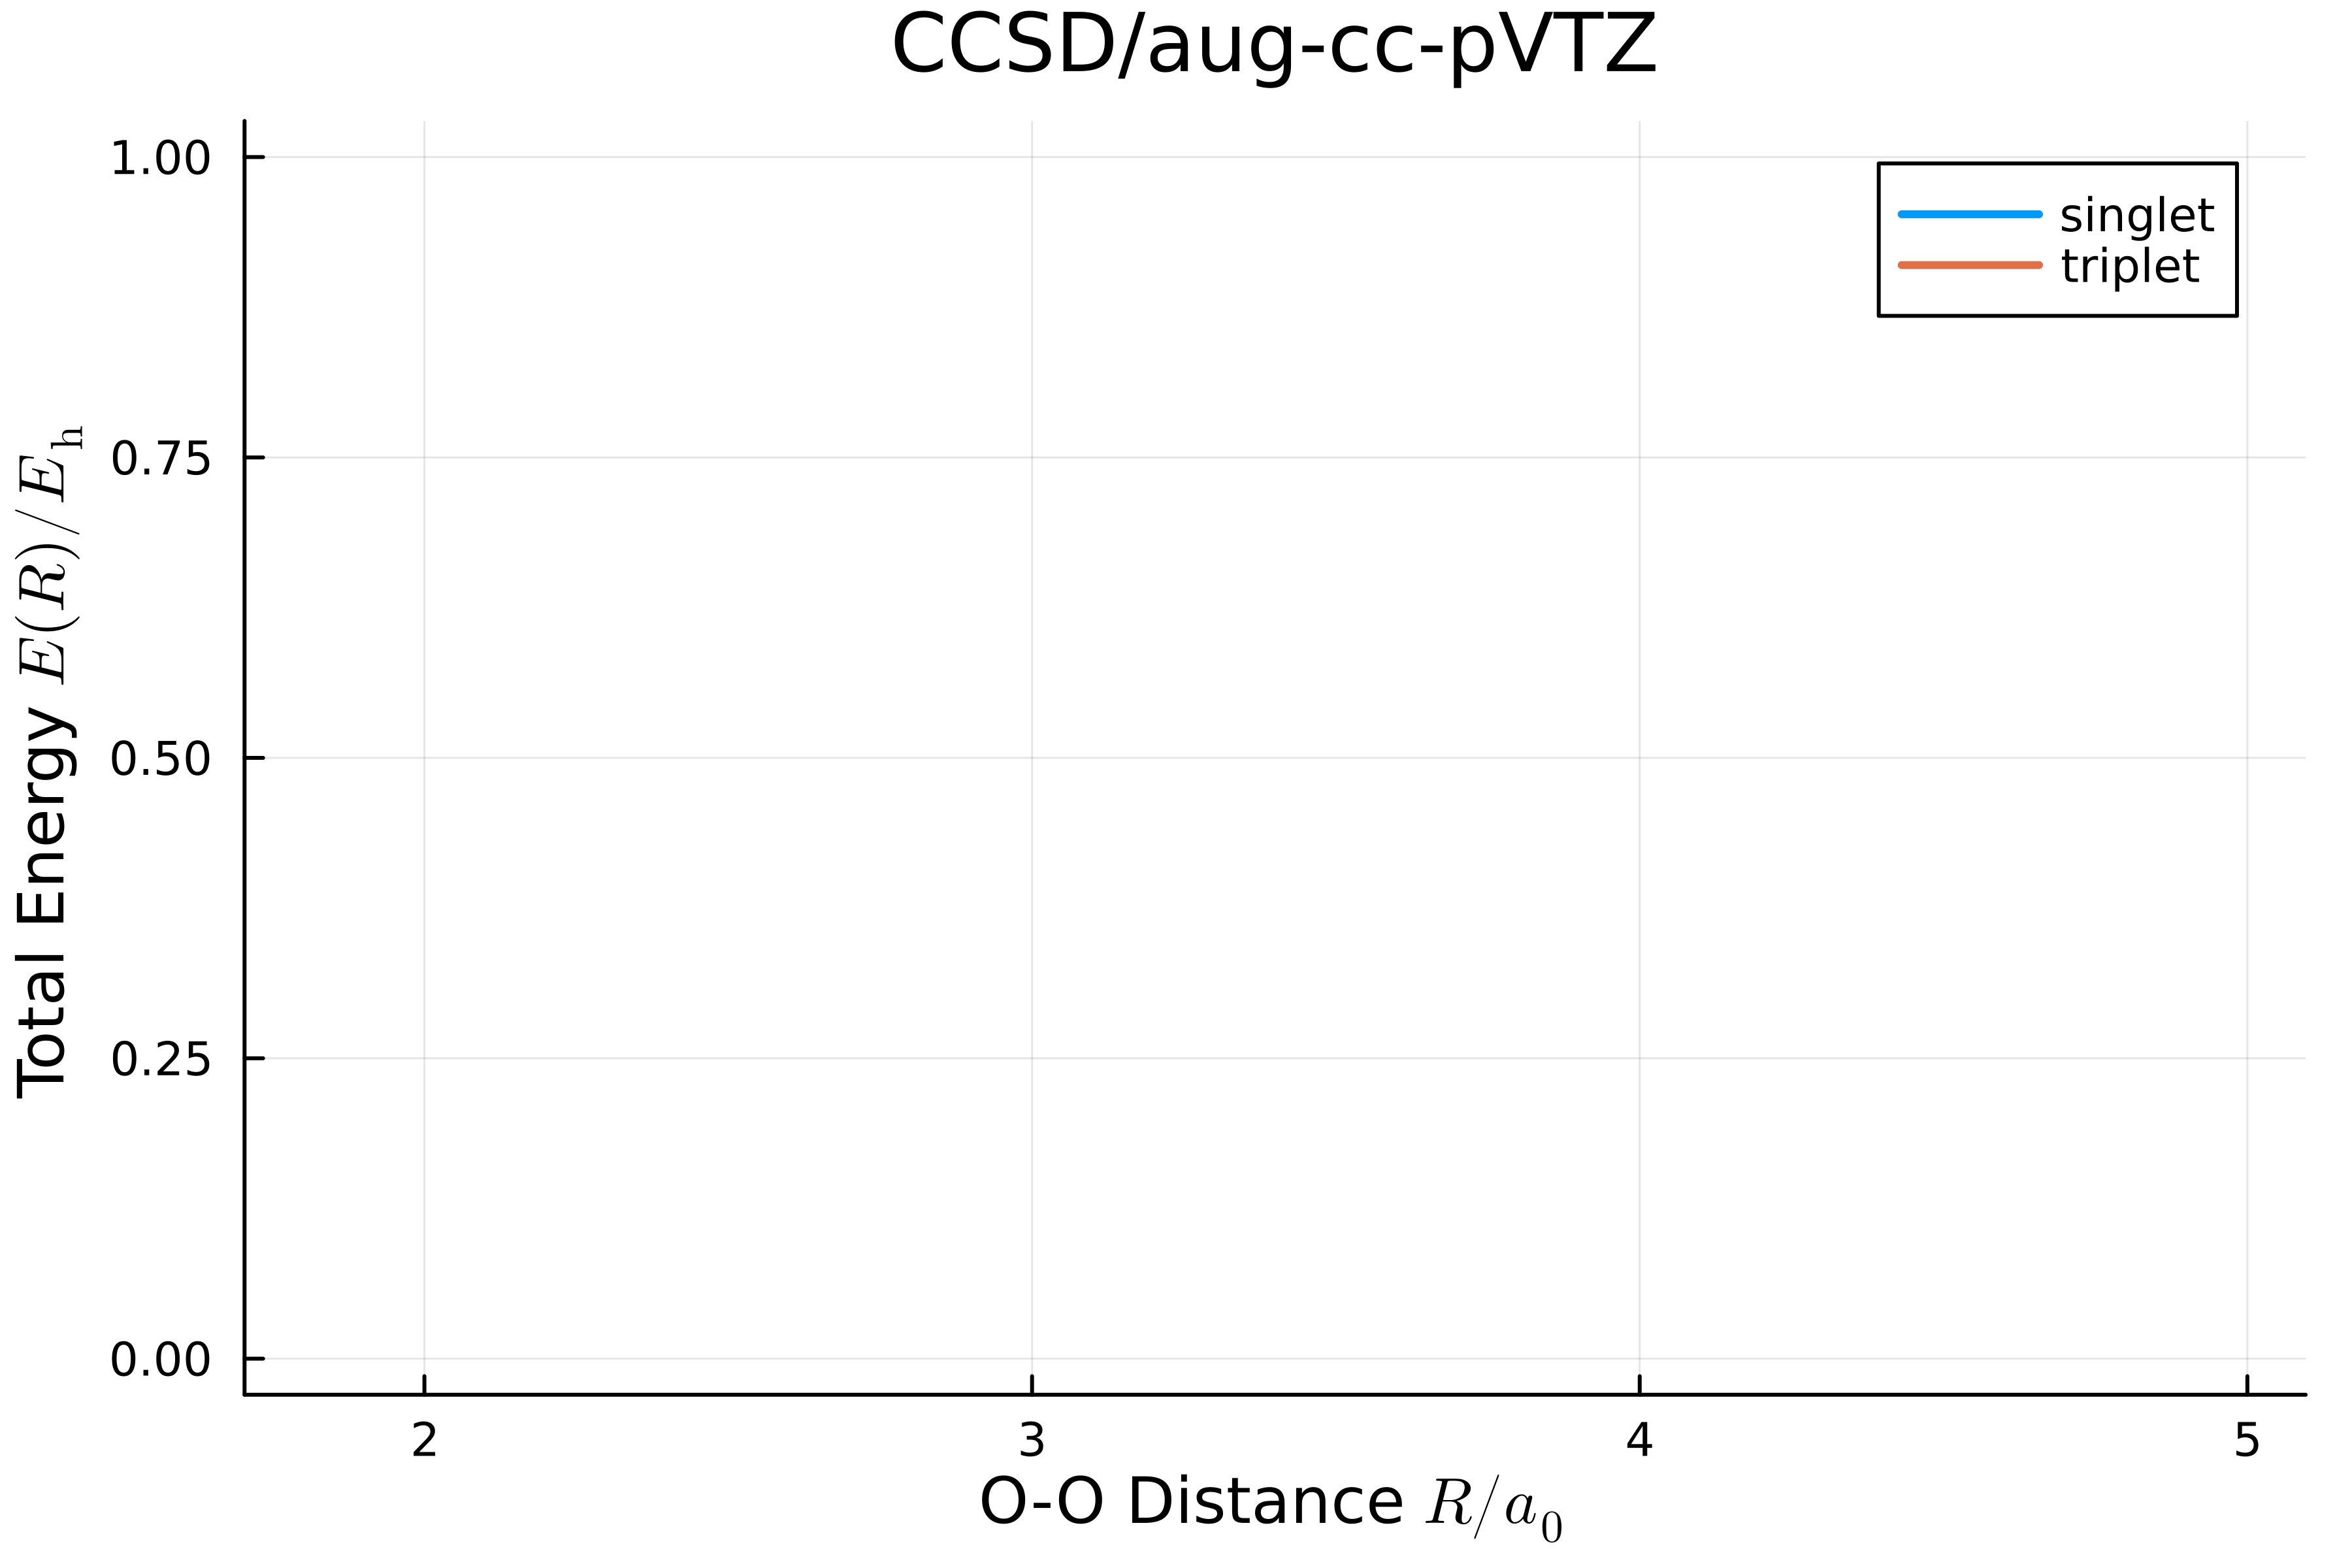

In [17]:
method = "CCSD" # "HF"
basis = "aug-cc-pVTZ"

for atom in ["O"] # "N"

    # plot
    plot(xlabel="$(atom)-$(atom) Distance \$R / a_0\$", ylabel=raw"Total Energy $E(R) / E_\mathrm{h}$", title="$(method)/$(basis)", fmt=:png, dpi=600)

    for spin in [1,3]

        # reset
        state = ["singlet", "", "triplet"][spin]
        X = []
        Y = []

        # loop for each distance
        for x in union(1.8:0.1:4, 4:0.2:5)

            # file name
            s = @sprintf("%.2f", x)
            name = "./PEC/$(atom)2/$(state)/$(method)/$(basis)/R=$(s)"

            # generating input file
            GaussDrive.write("$name.gjf", 
            """# $(method)/$(basis) Units=AU Stable=Opt

            $(atom)2 $state

            0  $spin
            $(atom)  0.0  0.0  0.0
            $(atom)  0.0  0.0  $(s)


            """)

            # run
            GaussDrive.run("$name.gjf")

            # result
            y = GaussDrive.energy("$name.out")
            push!(X, x)
            push!(Y, y)
            println(x, "\t", y)

        end

        # plot
        plot!(X, Y, lw=2, label=state)

    end

    savefig("$(atom)2.png")
    plot!() |> display
end

## HF vs CIS

g16.exe ./PEC/H2/CIS/aug-cc-pVTZ/R=1.00.gjf > already done
1.0	-1.08384712161	-0.537062477948
g16.exe ./PEC/H2/CIS/aug-cc-pVTZ/R=1.10.gjf > already done
1.1	-1.10946251663	-0.584169531098
g16.exe ./PEC/H2/CIS/aug-cc-pVTZ/R=1.20.gjf > already done
1.2	-1.12422484452	-0.619149128102
g16.exe ./PEC/H2/CIS/aug-cc-pVTZ/R=1.30.gjf > already done
1.3	-1.13134368667	-0.645300997204
g16.exe ./PEC/H2/CIS/aug-cc-pVTZ/R=1.40.gjf > already done
1.4	-1.13302684721	-0.664923446977
g16.exe ./PEC/H2/CIS/aug-cc-pVTZ/R=1.50.gjf > already done
1.5	-1.13082323275	-0.679652464082
g16.exe ./PEC/H2/CIS/aug-cc-pVTZ/R=1.60.gjf > already done
1.6	-1.12583771107	-0.690674746865
g16.exe ./PEC/H2/CIS/aug-cc-pVTZ/R=1.70.gjf > already done
1.7	-1.11886975938	-0.698864929612
g16.exe ./PEC/H2/CIS/aug-cc-pVTZ/R=1.80.gjf > already done
1.8	-1.11050486569	-0.704875048548
g16.exe ./PEC/H2/CIS/aug-cc-pVTZ/R=1.90.gjf > already done
1.9	-1.10117604126	-0.709195031307
g16.exe ./PEC/H2/CIS/aug-cc-pVTZ/R=2.00.gjf > already done
2

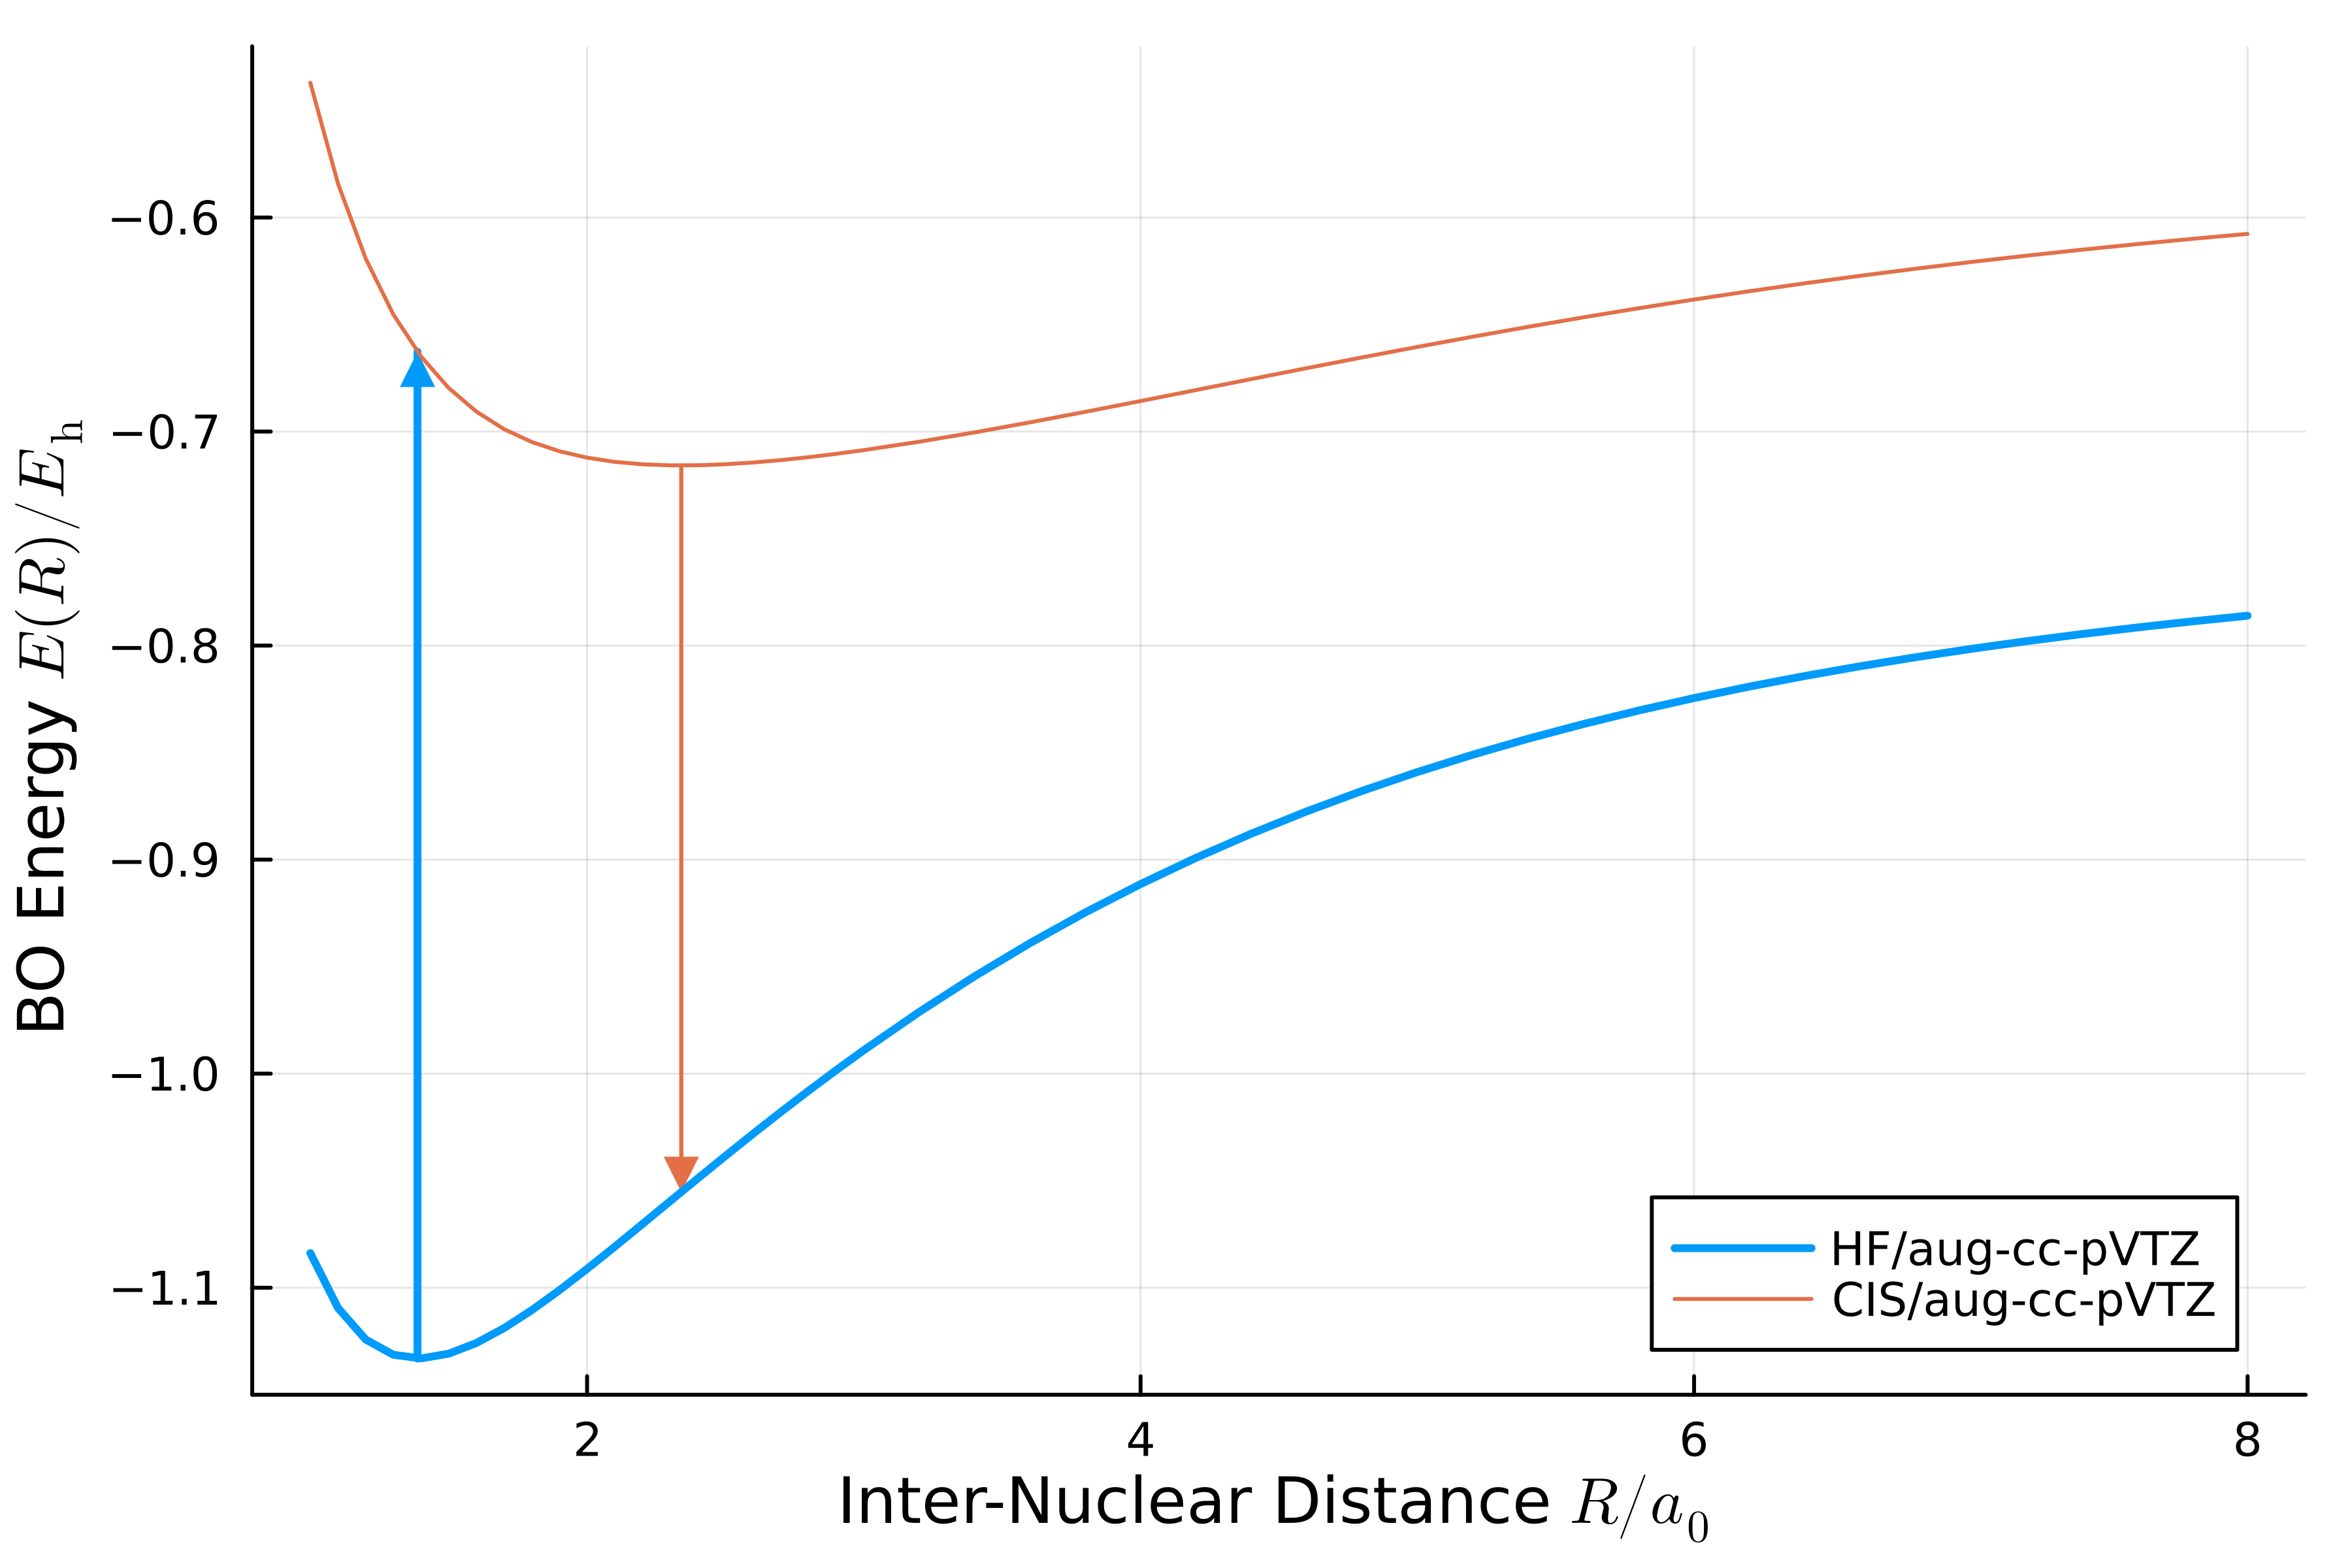

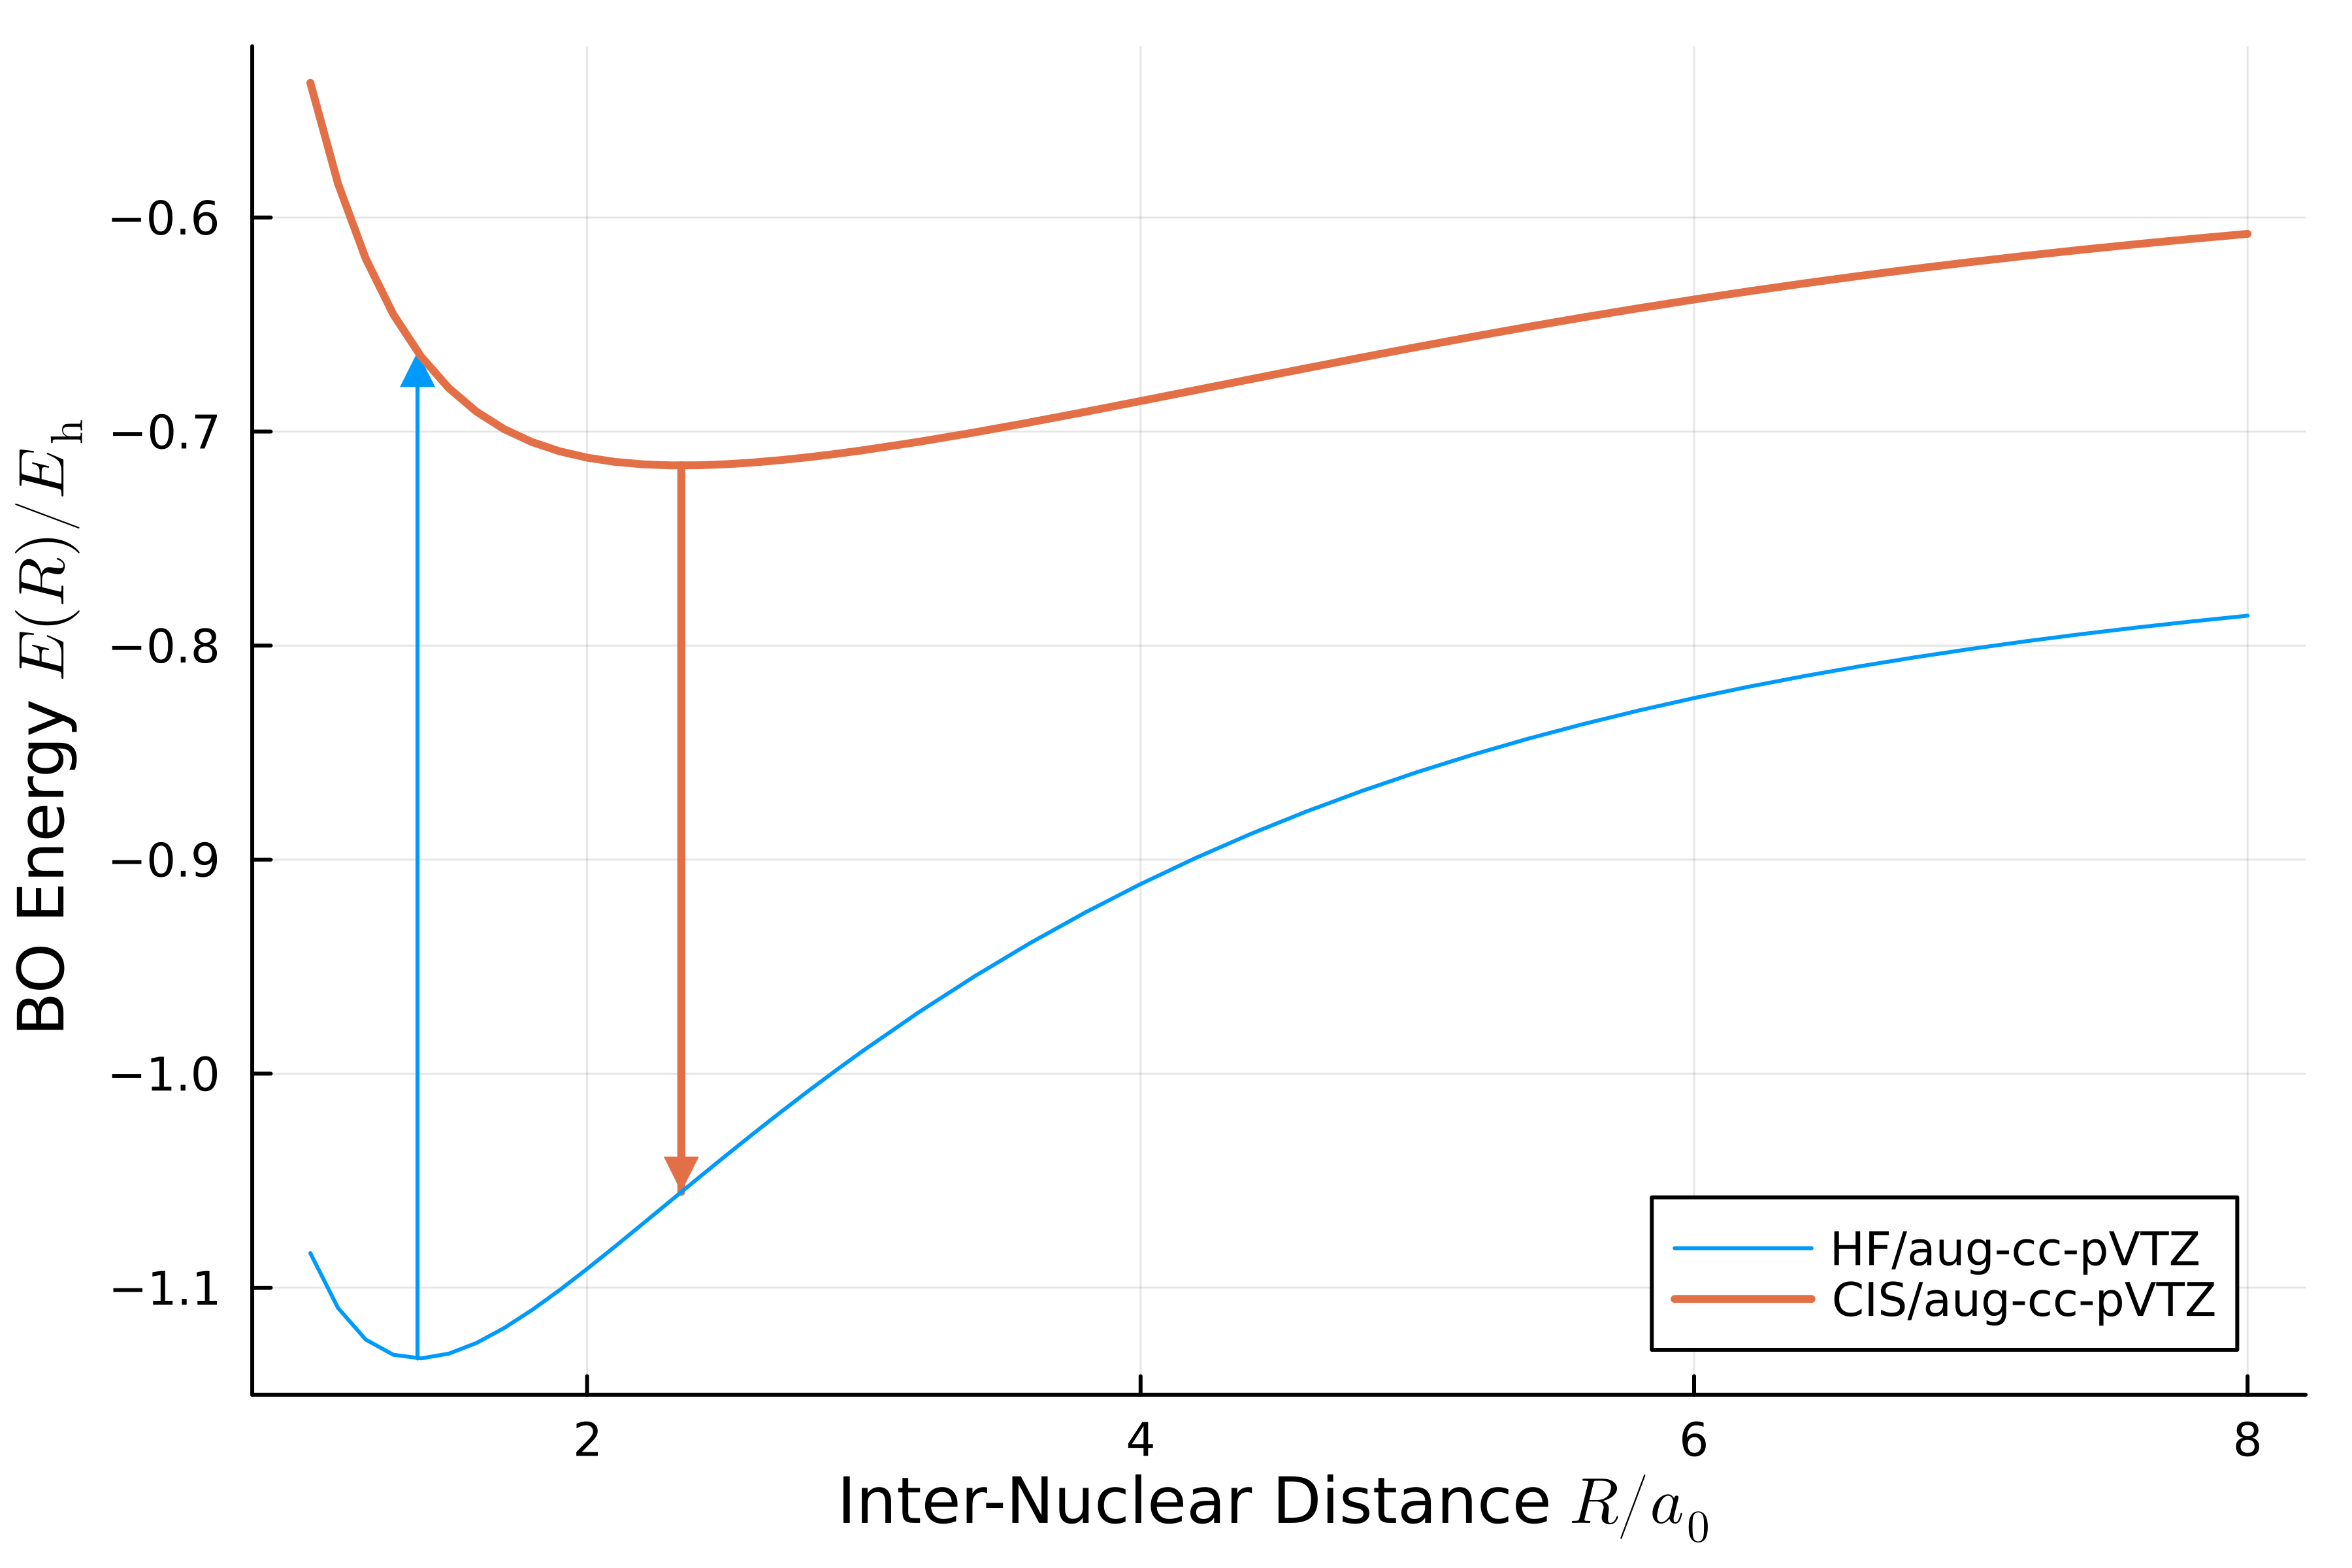

In [18]:
# reset
X = []
Y = []
Z = []

# configuration
basis = "aug-cc-pVTZ"

# loop for each distance
for x in union(1.0:0.1:3, 3:0.2:8)

    # file name
    s = @sprintf("%.2f", x)
    name = "./PEC/H2/CIS/$(basis)/R=$(s)"

    # generating input file
    GaussDrive.write("$name.gjf",
    """
    # CIS/$(basis) Units=AU
    
    H2 CIS
    
    0  1
    H  0.0  0.0  0.0
    H  0.0  0.0  $(s)
    
    
    """)
    
    # run
    GaussDrive.run("$name.gjf")
    
    # result
    y = GaussDrive.energy("$name.out", method="HF")
    z = GaussDrive.energy("$name.out", method="CIS")
    push!(X, x)
    push!(Y, y)
    push!(Z, z)
    println(x, "\t", y, "\t", z)
    
end

# plot
plot(ylims=(-1.15,-0.52), xlabel=raw"Inter-Nuclear Distance $R / a_0$", ylabel=raw"BO Energy $E(R) / E_\mathrm{h}$", fmt=:png, dpi=600)
x = GaussDrive.get("UV-vis/abs.out", r" ! R1\s*R\(1,2\)\s*(?<target>\d+(?:\.\d+)?)\s*.*") / 0.52917721092 # https://gaussian.com/constants/
y = GaussDrive.energy("UV-vis/abs.out", method="HF")
z = GaussDrive.energy("UV-vis/abs.out", method="CIS")
plot!([x,x], [y,z], label="", lc=1, lw=2, arrow=(:closed, 1))
x = GaussDrive.get("UV-vis/emi.out", r" ! R1\s*R\(1,2\)\s*(?<target>\d+(?:\.\d+)?)\s*.*") / 0.52917721092 # https://gaussian.com/constants/
y = GaussDrive.energy("UV-vis/emi.out", method="HF")
z = GaussDrive.energy("UV-vis/emi.out", method="CIS")
plot!([x,x], [z,y], label="", lc=2, lw=1, arrow=(:closed, 1))
plot!(X, Y, lw=2, lc=1, label="HF/$basis")
plot!(X, Z, lw=1, lc=2, label="CIS/$basis")
plot!() |> display

plot(ylims=(-1.15,-0.52), xlabel=raw"Inter-Nuclear Distance $R / a_0$", ylabel=raw"BO Energy $E(R) / E_\mathrm{h}$", fmt=:png, dpi=600)
x = GaussDrive.get("UV-vis/abs.out", r" ! R1\s*R\(1,2\)\s*(?<target>\d+(?:\.\d+)?)\s*.*") / 0.52917721092 # https://gaussian.com/constants/
y = GaussDrive.energy("UV-vis/abs.out", method="HF")
z = GaussDrive.energy("UV-vis/abs.out", method="CIS")
plot!([x,x], [y,z], label="", lc=1, lw=1, arrow=(:closed, 1))
x = GaussDrive.get("UV-vis/emi.out", r" ! R1\s*R\(1,2\)\s*(?<target>\d+(?:\.\d+)?)\s*.*") / 0.52917721092 # https://gaussian.com/constants/
y = GaussDrive.energy("UV-vis/emi.out", method="HF")
z = GaussDrive.energy("UV-vis/emi.out", method="CIS")
plot!([x,x], [z,y], label="", lc=2, lw=2, arrow=(:closed, 1))
plot!(X, Y, lw=1, lc=1, label="HF/$basis")
plot!(X, Z, lw=2, lc=2, label="CIS/$basis")
plot!() |> display

# save
# savefig("2psu.svg")